## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [1]:
# you code here
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

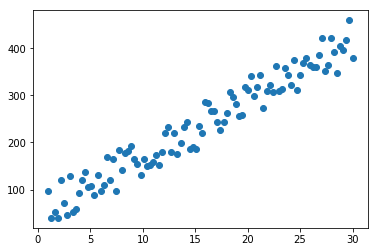

In [2]:
x = np.linspace(1,30, 100)
y = [el * 12 + 4+ random.random() * 100 for el in x]
plt.scatter(x, y)

In [130]:
from sklearn.linear_model import LinearRegression

In [131]:
reg = LinearRegression().fit(x.reshape(-1, 1), y)

In [132]:
reg.coef_

array([12.35000019])

In [133]:
reg.intercept_

49.59878020072853

In [134]:
y_hat = [el * reg.coef_ + reg.intercept_ for el in x]

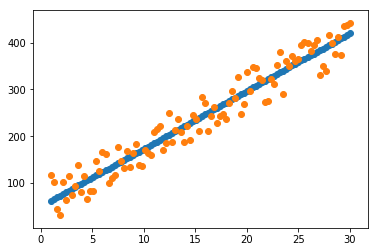

In [135]:
plt.scatter(x, y_hat)
plt.scatter(x, y)

In [136]:
def predict(x):
    return x * reg.coef_ + reg.intercept_

In [137]:
print(12, predict(12))

12 [197.79878242]


#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [138]:
# you code here
from scipy.spatial.distance import cosine
def distance(x1, x2):
    return cosine(x1, x2)
def model(x, y):
    return list(zip(x, y))
def predict(x_2, k=5):
    m = model(x, y)
    sorted_m = sorted(m, key=lambda xi: distance(xi[0], x_2))
    print(sorted_m[:k])
    return sum([el[1] for el in sorted_m[:k]]) / k


m = model(x, y)

In [139]:
predict(5.123456, k=5)

[(1.878787878787879, 30.421222513369734), (2.757575757575758, 115.71597262920216), (6.858585858585858, 109.99983156828752), (7.151515151515151, 115.83059347081625), (8.90909090909091, 164.1610730868851)]


107.22573865371214

# 想问一下老师, 这是上课的代码的东西, 为什么这里的distance不用欧氏距离, 而是要用from scipy.spatial.distance import cosine的 $$ 1 - {u ·v / ||u||_2 ||v||_2} $$ , 这个公式的几何意义是什么啊

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [140]:
# you code here
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [141]:
dataset = pd.DataFrame.from_dict(mock_data)
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [142]:
from collections import Counter
def entropy(lis):
    length = len(lis)
    counter = Counter(lis)
    lis  = [counter[el] / length for el in lis]
    return -sum([el * np.log(el) for el in lis])
entropy([1, 1, 1, 1])

-0.0

In [143]:
devide_set = set(dataset.columns)
from collections import deque

In [144]:
def decision_tree(dataset):
    def get_column(data, columns):
        entropy_dic = {}
        for column in columns:
            status = list(set(data[column]))
            sum_entropy = 0
            for i in range(len(status)):
                sum_entropy += entropy(data[data[column] == status[i]])
            entropy_dic[column] = sum_entropy
        entropy_dic = sorted([(k, v) for k, v in entropy_dic.items()], key=lambda x: x[1])
        return entropy_dic[0][0]
    
    dataset = [([], dataset)]  # [([('family_number', 1), ('income', '+10'), ], dataset)]
    finished_dataset = []
    
    while len(dataset):
        dataset_tuple = dataset.pop(-1)  # ([('family_number', 1), ('income', '+10'), ], dataset)
        data = dataset_tuple[1]  # dataset
        column_path = dataset_tuple[0]  # [('family_number', '1'), ('income', '+10'), ]
        
        if devide_set - set([path[0] for path in column_path]) == set():
            finished_dataset.append(dataset_tuple)
            continue
        column = get_column(data, devide_set - set([path[0] for path in column_path]))
        values = set(data[column])
        for value in values:
            sub_data= data[data[column] == value]
            new_column_path = column_path.copy()
            new_column_path.append((column, value))
            new_dataset_tuple = [new_column_path, sub_data]
            if len(sub_data) <= 1:
                finished_dataset.append(new_dataset_tuple)
            else:
                dataset.append(new_dataset_tuple)
    
    temp_set = set()  # [('family_number',), ('family_number', 'gender'), ('family_number', 'income'), ('family_number', 'income', 'bought'), ('family_number', 'income', 'bought', 'gender')]
    for el in [el[0] for el in finished_dataset]:  # [('family_number', 2), ('gender', 'M')]
        lis = [e[0] for e in el]  # ['family_number', 'income', 'bought', 'gender']
        for i in range(len(lis)):
            temp_set.add(tuple(lis[:i + 1]))
            
    return_dict = {}
    temp_set= sorted(list(temp_set), key=lambda x: len(x))
    for el in temp_set:
        sub_return_dict  = return_dict
        for sub_el in el:
            if not sub_el in sub_return_dict:
                sub_return_dict[sub_el] = {}
            sub_return_dict = sub_return_dict[sub_el]
    print(temp_set)
    print(return_dict)
    
decision_tree(dataset)
    
    
    

[('family_number',), ('family_number', 'gender'), ('family_number', 'income'), ('family_number', 'income', 'bought'), ('family_number', 'income', 'bought', 'gender')]
{'family_number': {'gender': {}, 'income': {'bought': {'gender': {}}}}}


#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [145]:
from sklearn.cluster import KMeans

In [146]:
X = [random.random() * 20 for _ in range(50)]
X.extend([random.random() * 20 + 25 for _ in range(50)])
random.shuffle(X)
Y = [random.random() * 20 for _ in range(50)]
Y.extend([random.random() * 20 + 25 for _ in range(50)])
random.shuffle(Y)

In [147]:
data = [(x, y) for x, y in zip(X, Y)]

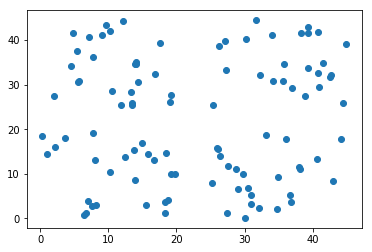

In [148]:
plt.scatter(X, Y)

In [149]:
cluster = KMeans(n_clusters=4, max_iter=1000)

In [150]:
cluster.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [151]:
cluster.cluster_centers_

array([[36.39883433, 35.04879992],
       [11.02747127, 33.78581585],
       [32.68585332,  9.2211975 ],
       [11.41340157, 10.00262044]])

In [152]:
cluster.labels_

array([0, 3, 1, 2, 2, 0, 2, 3, 0, 0, 1, 2, 2, 0, 1, 2, 3, 0, 3, 3, 0, 1,
       1, 3, 2, 0, 0, 2, 1, 2, 2, 2, 0, 1, 2, 2, 0, 1, 1, 0, 1, 0, 3, 0,
       1, 0, 3, 0, 2, 3, 1, 0, 3, 3, 2, 1, 2, 2, 0, 2, 1, 1, 3, 3, 3, 3,
       0, 2, 3, 1, 0, 0, 3, 3, 3, 1, 2, 0, 3, 3, 1, 1, 3, 3, 1, 1, 1, 3,
       1, 1, 2, 3, 0, 2, 2, 1, 2, 0, 2, 0])

In [153]:
color = ['red', 'yellow', 'blue', 'green']
label = [0,1,2,3]
color = {k: v for k, v in zip(label, color)}
data_label = {}

In [154]:
for new_data, lable in zip(data, cluster.labels_):
    data_label.setdefault(lable, []).append(new_data)

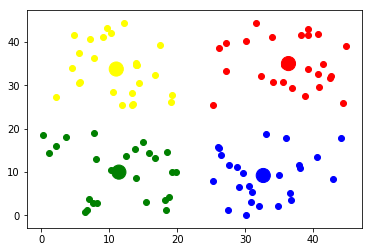

In [155]:
for label, dataset in data_label.items():
    x = [el[0] for el in dataset]
    y = [el[1] for el in dataset]
    plt.scatter(x, y, c=color[label])
centers_x = [el[0] for el in cluster.cluster_centers_]
centers_y = [el[1] for el in cluster.cluster_centers_]
plt.scatter(centers_x, centers_y, c=[v for v in color.values()], s=200)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:模型是一个可以把输入数据转换成输出数据的东西. 因为不存在一个模型可以表示所有的数据

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:过拟合是对训练集的预测准确率过于高, 预测集过于低, 欠拟合在两个数据集都较低, 过拟合原因: 模型过于复杂, 数据量少, 数据集片面, 欠拟合原因: 模型过于简单, 模型训练次数过少

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:precision:tp/所有的预测为t的数据, recall: tp/所有实际为p的数据, AUC: 在presision和recall曲线下面的面积, F1: 2*precision *recall / (precision+ recall), F2score 5*precision *recall / (4 * precision+ recall), F2属于Fβ, 是加权的准确率和召回率

# 老师, precision和recall我这么理解有没有问题啊, 我看这两个的公式表达的其实是这个意思

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:通过一个黑盒子, 让这个黑盒子自动学习输入的数据, 然后以后再输入没有标签的数据时, 可以自动判断标签

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

评价标准很重要, 很多二分类的结果并不是1比1的, 不能用判断对的比例来评价

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [186]:
# you code here
from collections import deque

mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

dataset = pd.DataFrame.from_dict(mock_data)
from collections import Counter

def entropy(lis):
    length = len(lis)
    counter = Counter(lis)
    lis  = [counter[el] / length for el in lis]
    return -sum([el * np.log(el) for el in lis])


def decision_tree_model(dataset):
    devide_set = set(dataset.columns) - {'bought'}

    def get_column(data, columns):
        entropy_dic = {}
        for column in columns:
            status = list(set(data[column]))
            sum_entropy = 0
            for i in range(len(status)):
                sum_entropy += entropy(data[data[column] == status[i]])
            entropy_dic[column] = sum_entropy
        entropy_dic = sorted([(k, v) for k, v in entropy_dic.items()], key=lambda x: x[1])
        return entropy_dic[0][0]
    
    dataset = [([], dataset)]  # [([('family_number', 1), ('income', '+10'), ], dataset)]
    finished_dataset = []
    
    while len(dataset):
        dataset_tuple = dataset.pop(-1)  # ([('family_number', 1), ('income', '+10'), ], dataset)
        data = dataset_tuple[1]  # dataset
        column_path = dataset_tuple[0]  # [('family_number', '1'), ('income', '+10'), ]
        
        if devide_set - set([path[0] for path in column_path]) == set():
            finished_dataset.append(dataset_tuple)
            continue
        column = get_column(data, devide_set - set([path[0] for path in column_path]))
        values = set(data[column])
        for value in values:
            sub_data= data[data[column] == value]
            new_column_path = column_path.copy()
            new_column_path.append((column, value))
            new_dataset_tuple = [new_column_path, sub_data]
            if len(sub_data) <= 1:
                finished_dataset.append(new_dataset_tuple)
            else:
                dataset.append(new_dataset_tuple)
    
    model = {}
    for data in finished_dataset:
        result = np.average(data[1]['bought'])
        data =data[0]
        sub_model = model
        for el in data:
            key = el[0] + '_' + str(el[1])
            if key not in sub_model:
                sub_model[key] = {}
            sub_model = sub_model[key]
        sub_model['result'] = result
    
    return model
model = decision_tree_model(dataset)


def predict(gender, income, family_number):
    key_1 = 'gender_' + gender
    key_2 = 'income_' + income
    key_3 = 'family_number_' + str(family_number)
    
    key_set = set()
    key_set.update([key_1, key_2, key_3])
    sub_model = model
    while 1:
        in_model = False
        for key in key_set:
            if key in sub_model:
                in_model = True
                sub_model = sub_model[key]
        if not in_model:
            break
    return sub_model['result']


In [187]:
{
    'family_number': {
        1: {
            'income': {
                '-10': 1, 
                '+10': {
                    'gender': {
                        'F': 0.5, 
                        'M': 0
                    }
                }
            }
        }, 
        2: {
            'gender': {
                'M': 1, 
                'F': 1
            }
        }
    }
}

{'family_number': {1: {'income': {'-10': 1,
    '+10': {'gender': {'F': 0.5, 'M': 0}}}},
  2: {'gender': {'M': 1, 'F': 1}}}}

In [188]:
{
    'family_number_1': {
        'income_-10': 1, 
        'income_+10': {
            'gender_F': 0.5, 
            'gender_M': 0
    }, 
    'family_number_2': {
        'gender_M': 1, 
        'gender_F': 1
        }
    }
}

{'family_number_1': {'income_-10': 1,
  'income_+10': {'gender_F': 0.5, 'gender_M': 0},
  'family_number_2': {'gender_M': 1, 'gender_F': 1}}}

In [189]:
model

{'family_number_2': {'gender_M': {'result': 1.0}, 'gender_F': {'result': 1.0}},
 'family_number_1': {'income_-10': {'result': 1.0},
  'income_+10': {'gender_F': {'result': 0.5}, 'gender_M': {'result': 0.0}}}}

In [190]:
predict('M', '-10', 1)

1.0

In [191]:
predict('F', '+10', 1)

0.5

In [192]:
predict('M', '+10', 1)

0.0

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

$$ loss = \frac{1}{n} \sum{|y_i - \hat{y_i}|}$$

$$ loss = \frac{1}{n} \sum{\sqrt{(y_i - kx_i - b_i)^2}} $$

$$ loss = \frac{1}{n} \sum{\sqrt{y_i^2 + k^2x_i^2 + b_i^2 - 2y_ix_ik - 2y_ib_i + 2kx_ib_i}} $$

$$ \frac {\partial{loss}} {\partial{k}} = -\frac{2}{n}\sum{\frac{y-\hat{y}}{\sqrt{(y-\hat{y})^2}}x_i}$$

$$ \frac {\partial{loss}} {\partial{b}} = -\frac{2}{n}\sum{\frac{y-\hat{y}}{\sqrt{(y-\hat{y})^2}}}$$

In [13]:
from sklearn.datasets import load_boston
import random

In [14]:
dataset = load_boston()

In [15]:
x,y=dataset['data'],dataset['target']

In [16]:
X_rm = x[:,5]

In [12]:
#define target function
def price(rm, k, b):
    return k * rm + b

In [9]:
# define loss function 
def loss(y,y_hat):
    return sum(np.abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

In [17]:
# define partial derivative 
def partial_derivative_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) * x_i / np.abs(y_i - y_hat_i)
    return -2/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) / np.abs(y_i - y_hat_i)
    return -2 / n * gradient

In [36]:
#initialized parameters

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100
k = 10
b = -50


learning_rate = 1e-3

iteration_num = 10000
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 10.234130434782614, parameters k is 10 and b is -50
Iteration 1, the loss is 10.176391543157314, parameters k is 10.010610802371541 and b is -49.99830039525692
Iteration 2, the loss is 10.118834688926214, parameters k is 10.021221604743083 and b is -49.99660079051384
Iteration 3, the loss is 10.061632313752714, parameters k is 10.031782992094861 and b is -49.9949090909091
Iteration 4, the loss is 10.004429938579207, parameters k is 10.04234437944664 and b is -49.993217391304356
Iteration 5, the loss is 9.947227563405718, parameters k is 10.052905766798418 and b is -49.991525691699614
Iteration 6, the loss is 9.89002518823222, parameters k is 10.063467154150196 and b is -49.98983399209487
Iteration 7, the loss is 9.832822813058723, parameters k is 10.074028541501974 and b is -49.98814229249013
Iteration 8, the loss is 9.775687368260263, parameters k is 10.084589928853752 and b is -49.98645059288539
Iteration 9, the loss is 9.719575078588301, parameters k is 10.0

Iteration 150, the loss is 4.9242830103604565, parameters k is 11.222431992094865 and b is -49.80363636363636
Iteration 151, the loss is 4.912545321569107, parameters k is 11.227225553359688 and b is -49.80284584980237
Iteration 152, the loss is 4.901069084853009, parameters k is 11.231967138339925 and b is -49.802063241106715
Iteration 153, the loss is 4.889892780688015, parameters k is 11.236657260869569 and b is -49.801288537549404
Iteration 154, the loss is 4.879178002673449, parameters k is 11.241248023715418 and b is -49.80052964426877
Iteration 155, the loss is 4.868644331226425, parameters k is 11.245784407114627 and b is -49.79977865612648
Iteration 156, the loss is 4.8583560616598245, parameters k is 11.25027263241107 and b is -49.799035573122524
Iteration 157, the loss is 4.848512375371149, parameters k is 11.254667324110676 and b is -49.79830830039525
Iteration 158, the loss is 4.838912229085209, parameters k is 11.259008411067198 and b is -49.79758893280631
Iteration 159, 

Iteration 293, the loss is 4.530848653231126, parameters k is 11.491614217391305 and b is -49.7562687747035
Iteration 294, the loss is 4.530829704414864, parameters k is 11.491798332015811 and b is -49.756205533596784
Iteration 295, the loss is 4.530810755598599, parameters k is 11.491982446640318 and b is -49.75614229249007
Iteration 296, the loss is 4.530791806782327, parameters k is 11.492166561264824 and b is -49.75607905138335
Iteration 297, the loss is 4.530772857966055, parameters k is 11.49235067588933 and b is -49.75601581027664
Iteration 298, the loss is 4.530753909149789, parameters k is 11.492534790513837 and b is -49.75595256916992
Iteration 299, the loss is 4.5307349603335245, parameters k is 11.492718905138343 and b is -49.755889328063205
Iteration 300, the loss is 4.530716011517258, parameters k is 11.49290301976285 and b is -49.75582608695649
Iteration 301, the loss is 4.530697062700984, parameters k is 11.493087134387356 and b is -49.75576284584977
Iteration 302, the 

Iteration 389, the loss is 4.529624218824604, parameters k is 11.50580590118577 and b is -49.75076679841922
Iteration 390, the loss is 4.529613475770646, parameters k is 11.505941636363636 and b is -49.750711462450845
Iteration 391, the loss is 4.5296027327166986, parameters k is 11.506077371541501 and b is -49.75065612648247
Iteration 392, the loss is 4.52959198966274, parameters k is 11.506213106719366 and b is -49.75060079051409
Iteration 393, the loss is 4.52958124660879, parameters k is 11.506348841897232 and b is -49.750545454545716
Iteration 394, the loss is 4.5295705035548375, parameters k is 11.506484577075097 and b is -49.75049011857734
Iteration 395, the loss is 4.529559760500882, parameters k is 11.506620312252963 and b is -49.75043478260896
Iteration 396, the loss is 4.52954901744693, parameters k is 11.506756047430828 and b is -49.750379446640586
Iteration 397, the loss is 4.529538274392978, parameters k is 11.506891782608694 and b is -49.75032411067221
Iteration 398, the

Iteration 481, the loss is 4.528767112912219, parameters k is 11.517192905138343 and b is -49.745841897233724
Iteration 482, the loss is 4.528762516616692, parameters k is 11.517276229249015 and b is -49.74579446640369
Iteration 483, the loss is 4.528757920321163, parameters k is 11.517359553359688 and b is -49.74574703557365
Iteration 484, the loss is 4.528753324025633, parameters k is 11.51744287747036 and b is -49.74569960474361
Iteration 485, the loss is 4.528748727730105, parameters k is 11.517526201581033 and b is -49.74565217391358
Iteration 486, the loss is 4.5287441314345775, parameters k is 11.517609525691705 and b is -49.74560474308354
Iteration 487, the loss is 4.528739535139047, parameters k is 11.517692849802378 and b is -49.7455573122535
Iteration 488, the loss is 4.528734938843517, parameters k is 11.51777617391305 and b is -49.745509881423466
Iteration 489, the loss is 4.528730342547988, parameters k is 11.517859498023723 and b is -49.74546245059343
Iteration 490, the 

Iteration 592, the loss is 4.528397289102232, parameters k is 11.524261438735252 and b is -49.74091699604823
Iteration 593, the loss is 4.528396639520695, parameters k is 11.524244138339995 and b is -49.74088537549487
Iteration 594, the loss is 4.528395989939164, parameters k is 11.524226837944738 and b is -49.74085375494151
Iteration 595, the loss is 4.528395385944092, parameters k is 11.524209537549481 and b is -49.740822134388154
Iteration 596, the loss is 4.528394997414596, parameters k is 11.524242134387427 and b is -49.740782608696456
Iteration 597, the loss is 4.528394347833058, parameters k is 11.52422483399217 and b is -49.7407509881431
Iteration 598, the loss is 4.528393698251529, parameters k is 11.524207533596913 and b is -49.74071936758974
Iteration 599, the loss is 4.528393048669988, parameters k is 11.524190233201656 and b is -49.74068774703638
Iteration 600, the loss is 4.528392701754894, parameters k is 11.5241729328064 and b is -49.740656126483024
Iteration 601, the l

Iteration 689, the loss is 4.528341332378893, parameters k is 11.523730936758989 and b is -49.7376679841907
Iteration 690, the loss is 4.528340682797355, parameters k is 11.523713636363732 and b is -49.73763636363734
Iteration 691, the loss is 4.528340165510098, parameters k is 11.523696335968475 and b is -49.737604743083985
Iteration 692, the loss is 4.528339690272791, parameters k is 11.52372893280642 and b is -49.73756521739229
Iteration 693, the loss is 4.528339040691257, parameters k is 11.523711632411164 and b is -49.73753359683893
Iteration 694, the loss is 4.52833839110972, parameters k is 11.523694332015907 and b is -49.73750197628557
Iteration 695, the loss is 4.528337824263926, parameters k is 11.52367703162065 and b is -49.73747035573221
Iteration 696, the loss is 4.528337398585155, parameters k is 11.523709628458596 and b is -49.737430830040516
Iteration 697, the loss is 4.528336749003619, parameters k is 11.523692328063339 and b is -49.73739920948716
Iteration 698, the lo

Iteration 795, the loss is 4.528280262583756, parameters k is 11.52314452569182 and b is -49.73411857707627
Iteration 796, the loss is 4.528279799755707, parameters k is 11.523177122529765 and b is -49.734079051384576
Iteration 797, the loss is 4.528279150174178, parameters k is 11.523159822134508 and b is -49.73404743083122
Iteration 798, the loss is 4.528278500592636, parameters k is 11.523142521739251 and b is -49.73401581027786
Iteration 799, the loss is 4.52827792133759, parameters k is 11.523125221343994 and b is -49.7339841897245
Iteration 800, the loss is 4.52827750806807, parameters k is 11.52315781818194 and b is -49.733944664032805
Iteration 801, the loss is 4.528276858486534, parameters k is 11.523140517786683 and b is -49.73391304347945
Iteration 802, the loss is 4.528276208905004, parameters k is 11.523123217391426 and b is -49.73388142292609
Iteration 803, the loss is 4.528275580091421, parameters k is 11.523105916996169 and b is -49.73384980237273
Iteration 804, the los

Iteration 878, the loss is 4.528232408831301, parameters k is 11.522706537549546 and b is -49.731335968380776
Iteration 879, the loss is 4.5282320172583574, parameters k is 11.522739134387491 and b is -49.73129644268908
Iteration 880, the loss is 4.528231367676817, parameters k is 11.522721833992234 and b is -49.73126482213572
Iteration 881, the loss is 4.528230718095279, parameters k is 11.522704533596977 and b is -49.73123320158236
Iteration 882, the loss is 4.528230068513745, parameters k is 11.52268723320172 and b is -49.731201581029005
Iteration 883, the loss is 4.528229724642096, parameters k is 11.522669932806464 and b is -49.73116996047565
Iteration 884, the loss is 4.528229075989179, parameters k is 11.522702529644409 and b is -49.73113043478395
Iteration 885, the loss is 4.528228426407641, parameters k is 11.522685229249152 and b is -49.73109881423059
Iteration 886, the loss is 4.528227776826106, parameters k is 11.522667928853895 and b is -49.731067193677234
Iteration 887, t

Iteration 1034, the loss is 4.528142677745014, parameters k is 11.521903770751162 and b is -49.72610276680004
Iteration 1035, the loss is 4.528142028163485, parameters k is 11.521886470355906 and b is -49.72607114624668
Iteration 1036, the loss is 4.528141383818709, parameters k is 11.521869169960649 and b is -49.726039525693324
Iteration 1037, the loss is 4.528141035638916, parameters k is 11.521901766798594 and b is -49.726000000001626
Iteration 1038, the loss is 4.52814038605738, parameters k is 11.521884466403337 and b is -49.72596837944827
Iteration 1039, the loss is 4.528139736475842, parameters k is 11.52186716600808 and b is -49.72593675889491
Iteration 1040, the loss is 4.528139086894305, parameters k is 11.521849865612824 and b is -49.72590513834155
Iteration 1041, the loss is 4.528138699629514, parameters k is 11.521832565217567 and b is -49.725873517788195
Iteration 1042, the loss is 4.528138094369746, parameters k is 11.521865162055512 and b is -49.7258339920965
Iteration 

Iteration 1190, the loss is 4.528052700052292, parameters k is 11.521051106719577 and b is -49.72087747035764
Iteration 1191, the loss is 4.528052345707111, parameters k is 11.521083703557522 and b is -49.720837944665945
Iteration 1192, the loss is 4.52805169612558, parameters k is 11.521066403162266 and b is -49.72080632411259
Iteration 1193, the loss is 4.528051046544041, parameters k is 11.521049102767009 and b is -49.72077470355923
Iteration 1194, the loss is 4.5280503969625086, parameters k is 11.521031802371752 and b is -49.72074308300587
Iteration 1195, the loss is 4.528050015863092, parameters k is 11.521014501976495 and b is -49.72071146245251
Iteration 1196, the loss is 4.528049404437942, parameters k is 11.52104709881444 and b is -49.720671936760816
Iteration 1197, the loss is 4.528048754856406, parameters k is 11.521029798419184 and b is -49.72064031620746
Iteration 1198, the loss is 4.5280481052748724, parameters k is 11.521012498023927 and b is -49.7206086956541
Iteration

Iteration 1304, the loss is 4.52798722223322, parameters k is 11.520475984189959 and b is -49.71705138340133
Iteration 1305, the loss is 4.527986572651688, parameters k is 11.520458683794702 and b is -49.717019762847976
Iteration 1306, the loss is 4.527985923070149, parameters k is 11.520441383399445 and b is -49.71698814229462
Iteration 1307, the loss is 4.5279854304444225, parameters k is 11.520424083004189 and b is -49.71695652174126
Iteration 1308, the loss is 4.527984930545588, parameters k is 11.520456679842134 and b is -49.71691699604956
Iteration 1309, the loss is 4.5279842809640485, parameters k is 11.520439379446877 and b is -49.716885375496204
Iteration 1310, the loss is 4.527983631382516, parameters k is 11.52042207905162 and b is -49.716853754942846
Iteration 1311, the loss is 4.527983089198253, parameters k is 11.520404778656363 and b is -49.71682213438949
Iteration 1312, the loss is 4.527982638857943, parameters k is 11.520437375494309 and b is -49.71678260869779
Iterati

Iteration 1415, the loss is 4.52792318627192, parameters k is 11.519852968379707 and b is -49.71333596838178
Iteration 1416, the loss is 4.527922748340867, parameters k is 11.519885565217653 and b is -49.71329644269008
Iteration 1417, the loss is 4.527922098759327, parameters k is 11.519868264822396 and b is -49.71326482213672
Iteration 1418, the loss is 4.527921449177795, parameters k is 11.519850964427139 and b is -49.713233201583364
Iteration 1419, the loss is 4.527920845025746, parameters k is 11.519833664031882 and b is -49.713201581030006
Iteration 1420, the loss is 4.5279204566532245, parameters k is 11.519866260869827 and b is -49.71316205533831
Iteration 1421, the loss is 4.527919807071696, parameters k is 11.51984896047457 and b is -49.71313043478495
Iteration 1422, the loss is 4.527919157490159, parameters k is 11.519831660079314 and b is -49.71309881423159
Iteration 1423, the loss is 4.527918507908624, parameters k is 11.519814359684057 and b is -49.713067193678235
Iteratio

Iteration 1514, the loss is 4.527866142035991, parameters k is 11.519337762846133 and b is -49.710015810279195
Iteration 1515, the loss is 4.527865624591753, parameters k is 11.519320462450876 and b is -49.70998418972584
Iteration 1516, the loss is 4.527865149511425, parameters k is 11.519353059288822 and b is -49.70994466403414
Iteration 1517, the loss is 4.527864499929883, parameters k is 11.519335758893565 and b is -49.70991304348078
Iteration 1518, the loss is 4.527863850348352, parameters k is 11.519318458498308 and b is -49.709881422927424
Iteration 1519, the loss is 4.52786328334558, parameters k is 11.519301158103051 and b is -49.709849802374066
Iteration 1520, the loss is 4.527862857823788, parameters k is 11.519333754940996 and b is -49.70981027668237
Iteration 1521, the loss is 4.527862208242249, parameters k is 11.51931645454574 and b is -49.70977865612901
Iteration 1522, the loss is 4.527861558660715, parameters k is 11.519299154150483 and b is -49.70974703557565
Iteration

Iteration 1624, the loss is 4.527802967306703, parameters k is 11.51878194466434 and b is -49.70632411067466
Iteration 1625, the loss is 4.527802317725174, parameters k is 11.518764644269083 and b is -49.7062924901213
Iteration 1626, the loss is 4.527801668143633, parameters k is 11.518747343873827 and b is -49.70626086956794
Iteration 1627, the loss is 4.527801039173084, parameters k is 11.51873004347857 and b is -49.706229249014584
Iteration 1628, the loss is 4.527800675619066, parameters k is 11.518762640316515 and b is -49.706189723322886
Iteration 1629, the loss is 4.527800026037533, parameters k is 11.518745339921258 and b is -49.70615810276953
Iteration 1630, the loss is 4.5277993764559925, parameters k is 11.518728039526001 and b is -49.70612648221617
Iteration 1631, the loss is 4.527798726874461, parameters k is 11.518710739130745 and b is -49.70609486166281
Iteration 1632, the loss is 4.527798354983878, parameters k is 11.518693438735488 and b is -49.706063241109455
Iteration

Iteration 1723, the loss is 4.52774581873908, parameters k is 11.518216841897564 and b is -49.703011857710415
Iteration 1724, the loss is 4.527745368477261, parameters k is 11.51824943873551 and b is -49.70297233201872
Iteration 1725, the loss is 4.527744718895729, parameters k is 11.518232138340252 and b is -49.70294071146536
Iteration 1726, the loss is 4.52774406931419, parameters k is 11.518214837944996 and b is -49.702909090912
Iteration 1727, the loss is 4.527743477492911, parameters k is 11.518197537549739 and b is -49.702877470358644
Iteration 1728, the loss is 4.5277430767896245, parameters k is 11.518230134387684 and b is -49.702837944666946
Iteration 1729, the loss is 4.527742427208091, parameters k is 11.518212833992427 and b is -49.70280632411359
Iteration 1730, the loss is 4.527741777626554, parameters k is 11.51819553359717 and b is -49.70277470356023
Iteration 1731, the loss is 4.527741136246742, parameters k is 11.518178233201914 and b is -49.70274308300687
Iteration 17

Iteration 1819, the loss is 4.527690598305081, parameters k is 11.517703640316558 and b is -49.699794466406246
Iteration 1820, the loss is 4.527690061335457, parameters k is 11.517736237154503 and b is -49.69975494071455
Iteration 1821, the loss is 4.527689411753923, parameters k is 11.517718936759247 and b is -49.69972332016119
Iteration 1822, the loss is 4.527688762172384, parameters k is 11.51770163636399 and b is -49.69969169960783
Iteration 1823, the loss is 4.527688257058916, parameters k is 11.517684335968733 and b is -49.699660079054475
Iteration 1824, the loss is 4.527687769647819, parameters k is 11.517716932806678 and b is -49.69962055336278
Iteration 1825, the loss is 4.5276871200662825, parameters k is 11.517699632411421 and b is -49.69958893280942
Iteration 1826, the loss is 4.527686470484751, parameters k is 11.517682332016165 and b is -49.69955731225606
Iteration 1827, the loss is 4.527685915812751, parameters k is 11.517665031620908 and b is -49.6995256917027
Iteration

Iteration 1931, the loss is 4.527626012886409, parameters k is 11.517113221344252 and b is -49.69603952569499
Iteration 1932, the loss is 4.527625587443101, parameters k is 11.517145818182197 and b is -49.696000000003295
Iteration 1933, the loss is 4.5276249378615745, parameters k is 11.51712851778694 and b is -49.69596837944994
Iteration 1934, the loss is 4.527624288280033, parameters k is 11.517111217391683 and b is -49.69593675889658
Iteration 1935, the loss is 4.52762367164024, parameters k is 11.517093916996426 and b is -49.69590513834322
Iteration 1936, the loss is 4.527623295755463, parameters k is 11.517126513834372 and b is -49.695865612651524
Iteration 1937, the loss is 4.527622646173929, parameters k is 11.517109213439115 and b is -49.695833992098166
Iteration 1938, the loss is 4.527621996592392, parameters k is 11.517091913043858 and b is -49.69580237154481
Iteration 1939, the loss is 4.527621347010862, parameters k is 11.517074612648601 and b is -49.69577075099145
Iteratio

Iteration 2042, the loss is 4.527562106075311, parameters k is 11.516540102767202 and b is -49.6923162055371
Iteration 2043, the loss is 4.527561456493778, parameters k is 11.516522802371945 and b is -49.69228458498374
Iteration 2044, the loss is 4.527561084524705, parameters k is 11.516505501976688 and b is -49.69225296443038
Iteration 2045, the loss is 4.527560463969216, parameters k is 11.516538098814634 and b is -49.69221343873868
Iteration 2046, the loss is 4.52755981438768, parameters k is 11.516520798419377 and b is -49.692181818185325
Iteration 2047, the loss is 4.527559164806142, parameters k is 11.51650349802412 and b is -49.69215019763197
Iteration 2048, the loss is 4.52755874327854, parameters k is 11.516486197628863 and b is -49.69211857707861
Iteration 2049, the loss is 4.52755817228158, parameters k is 11.516518794466808 and b is -49.69207905138691
Iteration 2050, the loss is 4.527557522700038, parameters k is 11.516501494071552 and b is -49.692047430833554
Iteration 205

Iteration 2140, the loss is 4.527505806408944, parameters k is 11.516042197628884 and b is -49.68902766798787
Iteration 2141, the loss is 4.527505156827405, parameters k is 11.516024897233628 and b is -49.688996047434514
Iteration 2142, the loss is 4.527504507245871, parameters k is 11.51600759683837 and b is -49.68896442688116
Iteration 2143, the loss is 4.527503865787571, parameters k is 11.515990296443114 and b is -49.6889328063278
Iteration 2144, the loss is 4.527503514721301, parameters k is 11.51602289328106 and b is -49.6888932806361
Iteration 2145, the loss is 4.527502865139771, parameters k is 11.516005592885802 and b is -49.68886166008274
Iteration 2146, the loss is 4.527502215558227, parameters k is 11.515988292490546 and b is -49.688830039529385
Iteration 2147, the loss is 4.527501565976698, parameters k is 11.515970992095289 and b is -49.68879841897603
Iteration 2148, the loss is 4.527501181598376, parameters k is 11.515953691700032 and b is -49.68876679842267
Iteration 21

Iteration 2233, the loss is 4.527452141373237, parameters k is 11.515531000000447 and b is -49.68591304348212
Iteration 2234, the loss is 4.5274514917917, parameters k is 11.51551369960519 and b is -49.68588142292876
Iteration 2235, the loss is 4.527450986599741, parameters k is 11.515496399209933 and b is -49.6858498023754
Iteration 2236, the loss is 4.527450499267134, parameters k is 11.515528996047879 and b is -49.6858102766837
Iteration 2237, the loss is 4.5274498496856, parameters k is 11.515511695652622 and b is -49.685778656130346
Iteration 2238, the loss is 4.527449200104065, parameters k is 11.515494395257365 and b is -49.68574703557699
Iteration 2239, the loss is 4.527448645353572, parameters k is 11.515477094862108 and b is -49.68571541502363
Iteration 2240, the loss is 4.527448207579502, parameters k is 11.515509691700053 and b is -49.68567588933193
Iteration 2241, the loss is 4.527447557997963, parameters k is 11.515492391304797 and b is -49.685644268778574
Iteration 2242,

Iteration 2329, the loss is 4.527396834231438, parameters k is 11.515017798419441 and b is -49.68269565217795
Iteration 2330, the loss is 4.527396184649903, parameters k is 11.515000498024184 and b is -49.68266403162459
Iteration 2331, the loss is 4.527395766165746, parameters k is 11.514983197628927 and b is -49.68263241107123
Iteration 2332, the loss is 4.527395192125328, parameters k is 11.515015794466873 and b is -49.682592885379535
Iteration 2333, the loss is 4.527394542543799, parameters k is 11.514998494071616 and b is -49.68256126482618
Iteration 2334, the loss is 4.527393892962264, parameters k is 11.514981193676359 and b is -49.68252964427282
Iteration 2335, the loss is 4.52739342491957, parameters k is 11.514963893281102 and b is -49.68249802371946
Iteration 2336, the loss is 4.527392900437697, parameters k is 11.514996490119048 and b is -49.68245849802776
Iteration 2337, the loss is 4.527392250856157, parameters k is 11.51497918972379 and b is -49.682426877474406
Iteration 

Iteration 2419, the loss is 4.527345117940335, parameters k is 11.514558501976774 and b is -49.679675889332266
Iteration 2420, the loss is 4.527344468358803, parameters k is 11.514541201581517 and b is -49.67964426877891
Iteration 2421, the loss is 4.527343818777264, parameters k is 11.51452390118626 and b is -49.67961264822555
Iteration 2422, the loss is 4.527343229920944, parameters k is 11.514506600791004 and b is -49.67958102767219
Iteration 2423, the loss is 4.527342826252701, parameters k is 11.514539197628949 and b is -49.679541501980495
Iteration 2424, the loss is 4.527342176671163, parameters k is 11.514521897233692 and b is -49.67950988142714
Iteration 2425, the loss is 4.527341527089632, parameters k is 11.514504596838435 and b is -49.67947826087378
Iteration 2426, the loss is 4.52734088867478, parameters k is 11.514487296443178 and b is -49.67944664032042
Iteration 2427, the loss is 4.527340534565064, parameters k is 11.514519893281124 and b is -49.679407114628724
Iteration

Iteration 2512, the loss is 4.527291452904631, parameters k is 11.514047304348336 and b is -49.67656126482651
Iteration 2513, the loss is 4.527290803323102, parameters k is 11.51403000395308 and b is -49.67652964427315
Iteration 2514, the loss is 4.527290350733115, parameters k is 11.514012703557823 and b is -49.676498023719795
Iteration 2515, the loss is 4.527289810798528, parameters k is 11.514045300395768 and b is -49.6764584980281
Iteration 2516, the loss is 4.527289161216996, parameters k is 11.514028000000511 and b is -49.67642687747474
Iteration 2517, the loss is 4.5272885116354615, parameters k is 11.514010699605254 and b is -49.67639525692138
Iteration 2518, the loss is 4.527288009486945, parameters k is 11.513993399209998 and b is -49.67636363636802
Iteration 2519, the loss is 4.527287519110893, parameters k is 11.514025996047943 and b is -49.676324110676326
Iteration 2520, the loss is 4.527286869529361, parameters k is 11.514008695652686 and b is -49.67629249012297
Iteration

Iteration 2618, the loss is 4.527230447806783, parameters k is 11.513460893281167 and b is -49.67301185771208
Iteration 2619, the loss is 4.527229920281453, parameters k is 11.513493490119112 and b is -49.672972332020386
Iteration 2620, the loss is 4.527229270699918, parameters k is 11.513476189723855 and b is -49.67294071146703
Iteration 2621, the loss is 4.527228621118384, parameters k is 11.513458889328598 and b is -49.67290909091367
Iteration 2622, the loss is 4.5272281065606155, parameters k is 11.513441588933341 and b is -49.67287747036031
Iteration 2623, the loss is 4.527227628593814, parameters k is 11.513474185771287 and b is -49.672837944668615
Iteration 2624, the loss is 4.5272269790122825, parameters k is 11.51345688537603 and b is -49.67280632411526
Iteration 2625, the loss is 4.527226329430744, parameters k is 11.513439584980773 and b is -49.6727747035619
Iteration 2626, the loss is 4.527225765314442, parameters k is 11.513422284585516 and b is -49.67274308300854
Iteratio

Iteration 2727, the loss is 4.5271677380767334, parameters k is 11.51292237549463 and b is -49.669351778660904
Iteration 2728, the loss is 4.527167088495196, parameters k is 11.512905075099374 and b is -49.669320158107546
Iteration 2729, the loss is 4.527166438913666, parameters k is 11.512887774704117 and b is -49.66928853755419
Iteration 2730, the loss is 4.527165862388109, parameters k is 11.51287047430886 and b is -49.66925691700083
Iteration 2731, the loss is 4.5271654463890965, parameters k is 11.512903071146805 and b is -49.66921739130913
Iteration 2732, the loss is 4.527164796807561, parameters k is 11.512885770751549 and b is -49.669185770755774
Iteration 2733, the loss is 4.527164147226024, parameters k is 11.512868470356292 and b is -49.66915415020242
Iteration 2734, the loss is 4.527163521141939, parameters k is 11.512851169961035 and b is -49.66912252964906
Iteration 2735, the loss is 4.5271631547014595, parameters k is 11.51288376679898 and b is -49.66908300395736
Iterati

Iteration 2838, the loss is 4.527103618215608, parameters k is 11.512299359684379 and b is -49.66563636364135
Iteration 2839, the loss is 4.5271032641843805, parameters k is 11.512331956522324 and b is -49.66559683794965
Iteration 2840, the loss is 4.527102614602843, parameters k is 11.512314656127067 and b is -49.66556521739629
Iteration 2841, the loss is 4.527101965021308, parameters k is 11.51229735573181 and b is -49.665533596842934
Iteration 2842, the loss is 4.527101315439772, parameters k is 11.512280055336554 and b is -49.665501976289576
Iteration 2843, the loss is 4.52710093402641, parameters k is 11.512262754941297 and b is -49.66547035573622
Iteration 2844, the loss is 4.52710032291521, parameters k is 11.512295351779242 and b is -49.66543083004452
Iteration 2845, the loss is 4.5270996733336695, parameters k is 11.512278051383985 and b is -49.66539920949116
Iteration 2846, the loss is 4.527099023752133, parameters k is 11.512260750988728 and b is -49.665367588937805
Iteratio

Iteration 2934, the loss is 4.527048397781607, parameters k is 11.511786158103373 and b is -49.66241897233718
Iteration 2935, the loss is 4.527047957042572, parameters k is 11.511818754941318 and b is -49.66237944664548
Iteration 2936, the loss is 4.52704730746104, parameters k is 11.511801454546061 and b is -49.66234782609212
Iteration 2937, the loss is 4.527046657879507, parameters k is 11.511784154150805 and b is -49.662316205538765
Iteration 2938, the loss is 4.527046056535442, parameters k is 11.511766853755548 and b is -49.66228458498541
Iteration 2939, the loss is 4.5270456653549385, parameters k is 11.511799450593493 and b is -49.66224505929371
Iteration 2940, the loss is 4.527045015773402, parameters k is 11.511782150198236 and b is -49.66221343874035
Iteration 2941, the loss is 4.527044366191859, parameters k is 11.51176484980298 and b is -49.662181818186994
Iteration 2942, the loss is 4.52704371661033, parameters k is 11.511747549407723 and b is -49.662150197633636
Iteration

Iteration 3022, the loss is 4.526997859839946, parameters k is 11.511311565218017 and b is -49.65947035573655
Iteration 3023, the loss is 4.526997233276038, parameters k is 11.511344162055963 and b is -49.659430830044855
Iteration 3024, the loss is 4.526996583694506, parameters k is 11.511326861660706 and b is -49.6593992094915
Iteration 3025, the loss is 4.526995934112971, parameters k is 11.511309561265449 and b is -49.65936758893814
Iteration 3026, the loss is 4.52699551859378, parameters k is 11.511292260870192 and b is -49.65933596838478
Iteration 3027, the loss is 4.526994941588408, parameters k is 11.511324857708138 and b is -49.65929644269308
Iteration 3028, the loss is 4.5269942920068695, parameters k is 11.51130755731288 and b is -49.659264822139725
Iteration 3029, the loss is 4.526993642425338, parameters k is 11.511290256917624 and b is -49.65923320158637
Iteration 3030, the loss is 4.5269931773476095, parameters k is 11.511272956522367 and b is -49.65920158103301
Iteration

Iteration 3118, the loss is 4.526942575715772, parameters k is 11.510848260870214 and b is -49.656245059294044
Iteration 3119, the loss is 4.5269419261342385, parameters k is 11.510830960474957 and b is -49.656213438740686
Iteration 3120, the loss is 4.526941276552697, parameters k is 11.5108136600797 and b is -49.65618181818733
Iteration 3121, the loss is 4.526940641102814, parameters k is 11.510796359684443 and b is -49.65615019763397
Iteration 3122, the loss is 4.526940284028131, parameters k is 11.510828956522388 and b is -49.65611067194227
Iteration 3123, the loss is 4.526939634446605, parameters k is 11.510811656127132 and b is -49.656079051388915
Iteration 3124, the loss is 4.526938984865066, parameters k is 11.510794355731875 and b is -49.65604743083556
Iteration 3125, the loss is 4.526938335283533, parameters k is 11.510777055336618 and b is -49.6560158102822
Iteration 3126, the loss is 4.526937956913613, parameters k is 11.510759754941361 and b is -49.65598418972884
Iteration

Iteration 3210, the loss is 4.526889560261607, parameters k is 11.510354363637033 and b is -49.653162055341646
Iteration 3211, the loss is 4.526888910680074, parameters k is 11.510337063241776 and b is -49.65313043478829
Iteration 3212, the loss is 4.526888261098533, parameters k is 11.51031976284652 and b is -49.65309881423493
Iteration 3213, the loss is 4.526887761914986, parameters k is 11.510302462451262 and b is -49.65306719368157
Iteration 3214, the loss is 4.5268872685739705, parameters k is 11.510335059289208 and b is -49.653027667989875
Iteration 3215, the loss is 4.526886618992431, parameters k is 11.510317758893951 and b is -49.65299604743652
Iteration 3216, the loss is 4.526885969410897, parameters k is 11.510300458498694 and b is -49.65296442688316
Iteration 3217, the loss is 4.526885420668815, parameters k is 11.510283158103437 and b is -49.6529328063298
Iteration 3218, the loss is 4.52688497688633, parameters k is 11.510315754941383 and b is -49.652893280638104
Iteration

Iteration 3314, the loss is 4.526829669744526, parameters k is 11.509802553360377 and b is -49.649675889333935
Iteration 3315, the loss is 4.526829020162991, parameters k is 11.50978525296512 and b is -49.64964426878058
Iteration 3316, the loss is 4.526828370581456, parameters k is 11.509767952569863 and b is -49.64961264822722
Iteration 3317, the loss is 4.526827858988646, parameters k is 11.509750652174606 and b is -49.64958102767386
Iteration 3318, the loss is 4.526827378056891, parameters k is 11.509783249012552 and b is -49.64954150198216
Iteration 3319, the loss is 4.52682672847535, parameters k is 11.509765948617295 and b is -49.649509881428806
Iteration 3320, the loss is 4.526826078893818, parameters k is 11.509748648222038 and b is -49.64947826087545
Iteration 3321, the loss is 4.526825517742473, parameters k is 11.509731347826781 and b is -49.64944664032209
Iteration 3322, the loss is 4.526825086369248, parameters k is 11.509763944664726 and b is -49.64940711463039
Iteration 

Iteration 3402, the loss is 4.526778945977992, parameters k is 11.509327960475021 and b is -49.64672727273331
Iteration 3403, the loss is 4.52677829639646, parameters k is 11.509310660079764 and b is -49.64669565217995
Iteration 3404, the loss is 4.526777663990012, parameters k is 11.509293359684508 and b is -49.64666403162659
Iteration 3405, the loss is 4.526777303871894, parameters k is 11.509325956522453 and b is -49.646624505934895
Iteration 3406, the loss is 4.526776654290357, parameters k is 11.509308656127196 and b is -49.64659288538154
Iteration 3407, the loss is 4.526776004708823, parameters k is 11.50929135573194 and b is -49.64656126482818
Iteration 3408, the loss is 4.526775355127286, parameters k is 11.509274055336682 and b is -49.64652964427482
Iteration 3409, the loss is 4.526774979800818, parameters k is 11.509256754941426 and b is -49.64649802372146
Iteration 3410, the loss is 4.526774362602719, parameters k is 11.50928935177937 and b is -49.646458498029766
Iteration 3

Iteration 3489, the loss is 4.526728871792997, parameters k is 11.508870667984922 and b is -49.64381027668604
Iteration 3490, the loss is 4.526728222211464, parameters k is 11.508853367589666 and b is -49.64377865613268
Iteration 3491, the loss is 4.526727572629926, parameters k is 11.508836067194409 and b is -49.643747035579324
Iteration 3492, the loss is 4.526727126048352, parameters k is 11.508818766799152 and b is -49.643715415025966
Iteration 3493, the loss is 4.526726580105363, parameters k is 11.508851363637097 and b is -49.64367588933427
Iteration 3494, the loss is 4.526725930523827, parameters k is 11.50883406324184 and b is -49.64364426878091
Iteration 3495, the loss is 4.526725280942296, parameters k is 11.508816762846584 and b is -49.64361264822755
Iteration 3496, the loss is 4.526724784802186, parameters k is 11.508799462451327 and b is -49.643581027674195
Iteration 3497, the loss is 4.526724288417722, parameters k is 11.508832059289272 and b is -49.6435415019825
Iteration

Iteration 3576, the loss is 4.526678797608004, parameters k is 11.508413375494824 and b is -49.64089328063877
Iteration 3577, the loss is 4.526678148026471, parameters k is 11.508396075099567 and b is -49.64086166008541
Iteration 3578, the loss is 4.526677498444937, parameters k is 11.50837877470431 and b is -49.640830039532055
Iteration 3579, the loss is 4.526676931049722, parameters k is 11.508361474309053 and b is -49.6407984189787
Iteration 3580, the loss is 4.52667650592037, parameters k is 11.508394071146999 and b is -49.640758893287
Iteration 3581, the loss is 4.5266758563388345, parameters k is 11.508376770751742 and b is -49.64072727273364
Iteration 3582, the loss is 4.5266752067572975, parameters k is 11.508359470356485 and b is -49.640695652180284
Iteration 3583, the loss is 4.5266745898035525, parameters k is 11.508342169961228 and b is -49.640664031626926
Iteration 3584, the loss is 4.526674214232728, parameters k is 11.508374766799173 and b is -49.64062450593523
Iteration

Iteration 3667, the loss is 4.5266263931080655, parameters k is 11.507886881423698 and b is -49.63784980237807
Iteration 3668, the loss is 4.526625782153841, parameters k is 11.507919478261643 and b is -49.63781027668637
Iteration 3669, the loss is 4.526625132572302, parameters k is 11.507902177866386 and b is -49.637778656133015
Iteration 3670, the loss is 4.526624482990768, parameters k is 11.50788487747113 and b is -49.63774703557966
Iteration 3671, the loss is 4.526624051861893, parameters k is 11.507867577075872 and b is -49.6377154150263
Iteration 3672, the loss is 4.526623490466196, parameters k is 11.507900173913818 and b is -49.6376758893346
Iteration 3673, the loss is 4.526622840884664, parameters k is 11.507882873518561 and b is -49.637644268781244
Iteration 3674, the loss is 4.526622191303129, parameters k is 11.507865573123304 and b is -49.637612648227886
Iteration 3675, the loss is 4.526621710615729, parameters k is 11.507848272728047 and b is -49.63758102767453
Iteration

Iteration 3757, the loss is 4.526574408805773, parameters k is 11.50742758498103 and b is -49.63483003953239
Iteration 3758, the loss is 4.526573856863265, parameters k is 11.507410284585774 and b is -49.63479841897903
Iteration 3759, the loss is 4.526573416281207, parameters k is 11.507442881423719 and b is -49.634758893287334
Iteration 3760, the loss is 4.5265727666996725, parameters k is 11.507425581028462 and b is -49.634727272733976
Iteration 3761, the loss is 4.526572117118133, parameters k is 11.507408280633205 and b is -49.63469565218062
Iteration 3762, the loss is 4.526571515617095, parameters k is 11.507390980237949 and b is -49.63466403162726
Iteration 3763, the loss is 4.526571124593569, parameters k is 11.507423577075894 and b is -49.63462450593556
Iteration 3764, the loss is 4.526570475012034, parameters k is 11.507406276680637 and b is -49.634592885382204
Iteration 3765, the loss is 4.526569825430499, parameters k is 11.50738897628538 and b is -49.63456126482885
Iteratio

Iteration 3848, the loss is 4.526522042933145, parameters k is 11.506950988143107 and b is -49.63177865613335
Iteration 3849, the loss is 4.526521393351607, parameters k is 11.50693368774785 and b is -49.63174703557999
Iteration 3850, the loss is 4.526520977675439, parameters k is 11.506916387352593 and b is -49.63171541502663
Iteration 3851, the loss is 4.526520400827038, parameters k is 11.506948984190538 and b is -49.631675889334936
Iteration 3852, the loss is 4.526519751245505, parameters k is 11.506931683795282 and b is -49.63164426878158
Iteration 3853, the loss is 4.526519101663972, parameters k is 11.506914383400025 and b is -49.63161264822822
Iteration 3854, the loss is 4.526518636429265, parameters k is 11.506897083004768 and b is -49.63158102767486
Iteration 3855, the loss is 4.526518109139401, parameters k is 11.506929679842713 and b is -49.631541501983165
Iteration 3856, the loss is 4.52651745955786, parameters k is 11.506912379447456 and b is -49.63150988142981
Iteration 

Iteration 3936, the loss is 4.526471319166605, parameters k is 11.506476395257751 and b is -49.62883003953272
Iteration 3937, the loss is 4.526470782676799, parameters k is 11.506459094862494 and b is -49.628798418979365
Iteration 3938, the loss is 4.526470326642045, parameters k is 11.50649169170044 and b is -49.62875889328767
Iteration 3939, the loss is 4.526469677060508, parameters k is 11.506474391305183 and b is -49.62872727273431
Iteration 3940, the loss is 4.526469027478971, parameters k is 11.506457090909926 and b is -49.62869565218095
Iteration 3941, the loss is 4.5264684414306355, parameters k is 11.50643979051467 and b is -49.62866403162759
Iteration 3942, the loss is 4.526468034954406, parameters k is 11.506472387352614 and b is -49.628624505935896
Iteration 3943, the loss is 4.526467385372873, parameters k is 11.506455086957358 and b is -49.62859288538254
Iteration 3944, the loss is 4.526466735791336, parameters k is 11.5064377865621 and b is -49.62856126482918
Iteration 3

Iteration 4027, the loss is 4.526418953293975, parameters k is 11.505999798419827 and b is -49.62577865613368
Iteration 4028, the loss is 4.526418303712447, parameters k is 11.50598249802457 and b is -49.625747035580325
Iteration 4029, the loss is 4.526417903488972, parameters k is 11.505965197629314 and b is -49.62571541502697
Iteration 4030, the loss is 4.526417311187875, parameters k is 11.505997794467259 and b is -49.62567588933527
Iteration 4031, the loss is 4.526416661606339, parameters k is 11.505980494072002 and b is -49.62564426878191
Iteration 4032, the loss is 4.5264160120248045, parameters k is 11.505963193676745 and b is -49.625612648228554
Iteration 4033, the loss is 4.5264155622428035, parameters k is 11.505945893281488 and b is -49.625581027675196
Iteration 4034, the loss is 4.5264150195002415, parameters k is 11.505978490119434 and b is -49.6255415019835
Iteration 4035, the loss is 4.526414369918704, parameters k is 11.505961189724177 and b is -49.62550988143014
Iterat

Iteration 4117, the loss is 4.526367237002882, parameters k is 11.50554050197716 and b is -49.622758893288
Iteration 4118, the loss is 4.526366587421345, parameters k is 11.505523201581903 and b is -49.62272727273464
Iteration 4119, the loss is 4.526365937839812, parameters k is 11.505505901186647 and b is -49.622695652181285
Iteration 4120, the loss is 4.526365367244178, parameters k is 11.50548860079139 and b is -49.62266403162793
Iteration 4121, the loss is 4.52636494531524, parameters k is 11.505521197629335 and b is -49.62262450593623
Iteration 4122, the loss is 4.526364295733708, parameters k is 11.505503897234078 and b is -49.62259288538287
Iteration 4123, the loss is 4.526363646152174, parameters k is 11.505486596838821 and b is -49.622561264829514
Iteration 4124, the loss is 4.526363025998004, parameters k is 11.505469296443565 and b is -49.622529644276156
Iteration 4125, the loss is 4.526362653627608, parameters k is 11.50550189328151 and b is -49.62249011858446
Iteration 412

Iteration 4220, the loss is 4.526307805564008, parameters k is 11.504956094862559 and b is -49.61931225297199
Iteration 4221, the loss is 4.526307346485797, parameters k is 11.504988691700504 and b is -49.61927272728029
Iteration 4222, the loss is 4.526306696904268, parameters k is 11.504971391305247 and b is -49.61924110672693
Iteration 4223, the loss is 4.5263060473227315, parameters k is 11.50495409090999 and b is -49.619209486173574
Iteration 4224, the loss is 4.52630546431784, parameters k is 11.504936790514734 and b is -49.619177865620216
Iteration 4225, the loss is 4.526305054798162, parameters k is 11.504969387352679 and b is -49.61913833992852
Iteration 4226, the loss is 4.526304405216631, parameters k is 11.504952086957422 and b is -49.61910671937516
Iteration 4227, the loss is 4.5263037556350945, parameters k is 11.504934786562165 and b is -49.6190750988218
Iteration 4228, the loss is 4.52630312307167, parameters k is 11.504917486166908 and b is -49.619043478268445
Iteration

Iteration 4310, the loss is 4.526255973137736, parameters k is 11.504496798419892 and b is -49.616292490126305
Iteration 4311, the loss is 4.526255323556201, parameters k is 11.504479498024635 and b is -49.61626086957295
Iteration 4312, the loss is 4.526254926376174, parameters k is 11.504462197629378 and b is -49.61622924901959
Iteration 4313, the loss is 4.526254331031631, parameters k is 11.504494794467323 and b is -49.61618972332789
Iteration 4314, the loss is 4.526253681450097, parameters k is 11.504477494072066 and b is -49.616158102774534
Iteration 4315, the loss is 4.526253031868567, parameters k is 11.50446019367681 and b is -49.616126482221176
Iteration 4316, the loss is 4.526252585130011, parameters k is 11.504442893281553 and b is -49.61609486166782
Iteration 4317, the loss is 4.526252039343996, parameters k is 11.504475490119498 and b is -49.61605533597612
Iteration 4318, the loss is 4.526251389762462, parameters k is 11.504458189724241 and b is -49.61602371542276
Iteratio

Iteration 4406, the loss is 4.526200665995928, parameters k is 11.503983596838886 and b is -49.61307509882214
Iteration 4407, the loss is 4.526200048885212, parameters k is 11.503966296443629 and b is -49.61304347826878
Iteration 4408, the loss is 4.526199673471365, parameters k is 11.503998893281574 and b is -49.61300395257708
Iteration 4409, the loss is 4.526199023889827, parameters k is 11.503981592886317 and b is -49.61297233202372
Iteration 4410, the loss is 4.526198374308291, parameters k is 11.50396429249106 and b is -49.612940711470365
Iteration 4411, the loss is 4.526197724726755, parameters k is 11.503946992095804 and b is -49.61290909091701
Iteration 4412, the loss is 4.526197364696011, parameters k is 11.503929691700547 and b is -49.61287747036365
Iteration 4413, the loss is 4.526196732202187, parameters k is 11.503962288538492 and b is -49.61283794467195
Iteration 4414, the loss is 4.526196082620654, parameters k is 11.503944988143235 and b is -49.612806324118594
Iteration

Iteration 4502, the loss is 4.526145358854126, parameters k is 11.50347039525788 and b is -49.60985770751797
Iteration 4503, the loss is 4.526144828451212, parameters k is 11.503453094862623 and b is -49.60982608696461
Iteration 4504, the loss is 4.526144366329559, parameters k is 11.503485691700568 and b is -49.60978656127291
Iteration 4505, the loss is 4.526143716748023, parameters k is 11.503468391305312 and b is -49.609754940719554
Iteration 4506, the loss is 4.526143067166489, parameters k is 11.503451090910055 and b is -49.6097233201662
Iteration 4507, the loss is 4.5261424872050435, parameters k is 11.503433790514798 and b is -49.60969169961284
Iteration 4508, the loss is 4.5261420746419185, parameters k is 11.503466387352743 and b is -49.60965217392114
Iteration 4509, the loss is 4.526141425060385, parameters k is 11.503449086957486 and b is -49.60962055336778
Iteration 4510, the loss is 4.52614077547885, parameters k is 11.50343178656223 and b is -49.609588932814425
Iteration 

Iteration 4591, the loss is 4.526094290509551, parameters k is 11.502978501977267 and b is -49.60687747036398
Iteration 4592, the loss is 4.526093642563024, parameters k is 11.503011098815213 and b is -49.606837944672286
Iteration 4593, the loss is 4.526092992981494, parameters k is 11.502993798419956 and b is -49.60680632411893
Iteration 4594, the loss is 4.526092343399957, parameters k is 11.5029764980247 and b is -49.60677470356557
Iteration 4595, the loss is 4.526091949263384, parameters k is 11.502959197629442 and b is -49.60674308301221
Iteration 4596, the loss is 4.526091350875388, parameters k is 11.502991794467388 and b is -49.606703557320515
Iteration 4597, the loss is 4.526090701293852, parameters k is 11.50297449407213 and b is -49.60667193676716
Iteration 4598, the loss is 4.526090051712321, parameters k is 11.502957193676874 and b is -49.6066403162138
Iteration 4599, the loss is 4.526089608017215, parameters k is 11.502939893281617 and b is -49.60660869566044
Iteration 46

Iteration 4700, the loss is 4.526031460358308, parameters k is 11.502439984190731 and b is -49.6032173913128
Iteration 4701, the loss is 4.526030810776779, parameters k is 11.502422683795475 and b is -49.603185770759445
Iteration 4702, the loss is 4.526030161195237, parameters k is 11.502405383400218 and b is -49.60315415020609
Iteration 4703, the loss is 4.526029705090879, parameters k is 11.502388083004961 and b is -49.60312252965273
Iteration 4704, the loss is 4.526029168670671, parameters k is 11.502420679842906 and b is -49.60308300396103
Iteration 4705, the loss is 4.526028519089139, parameters k is 11.50240337944765 and b is -49.603051383407674
Iteration 4706, the loss is 4.526027869507598, parameters k is 11.502386079052393 and b is -49.603019762854316
Iteration 4707, the loss is 4.52602736384471, parameters k is 11.502368778657136 and b is -49.60298814230096
Iteration 4708, the loss is 4.526026876983039, parameters k is 11.502401375495081 and b is -49.60294861660926
Iteration 

Iteration 4804, the loss is 4.525971569841231, parameters k is 11.501888173914075 and b is -49.59973122530509
Iteration 4805, the loss is 4.5259709202597, parameters k is 11.501870873518818 and b is -49.599699604751734
Iteration 4806, the loss is 4.525970270678157, parameters k is 11.501853573123562 and b is -49.599667984198376
Iteration 4807, the loss is 4.525969802164543, parameters k is 11.501836272728305 and b is -49.59963636364502
Iteration 4808, the loss is 4.525969278153597, parameters k is 11.50186886956625 and b is -49.59959683795332
Iteration 4809, the loss is 4.525968628572056, parameters k is 11.501851569170993 and b is -49.59956521739996
Iteration 4810, the loss is 4.525967978990523, parameters k is 11.501834268775736 and b is -49.599533596846605
Iteration 4811, the loss is 4.525967460918379, parameters k is 11.50181696838048 and b is -49.59950197629325
Iteration 4812, the loss is 4.5259669864659555, parameters k is 11.501849565218425 and b is -49.59946245060155
Iteration 

Iteration 4930, the loss is 4.525898921722891, parameters k is 11.50120524110778 and b is -49.59550988143181
Iteration 4931, the loss is 4.5258982721413545, parameters k is 11.501187940712523 and b is -49.59547826087845
Iteration 4932, the loss is 4.525897850064337, parameters k is 11.501170640317266 and b is -49.59544664032509
Iteration 4933, the loss is 4.52589727961679, parameters k is 11.501203237155211 and b is -49.595407114633396
Iteration 4934, the loss is 4.525896630035258, parameters k is 11.501185936759954 and b is -49.59537549408004
Iteration 4935, the loss is 4.525895980453721, parameters k is 11.501168636364698 and b is -49.59534387352668
Iteration 4936, the loss is 4.5258955088181665, parameters k is 11.50115133596944 and b is -49.59531225297332
Iteration 4937, the loss is 4.525894987929153, parameters k is 11.501183932807386 and b is -49.595272727281625
Iteration 4938, the loss is 4.525894338347615, parameters k is 11.50116663241213 and b is -49.59524110672827
Iteration 

Iteration 5018, the loss is 4.525848197956361, parameters k is 11.500730648222424 and b is -49.59256126483118
Iteration 5019, the loss is 4.525847655065713, parameters k is 11.500713347827167 and b is -49.592529644277825
Iteration 5020, the loss is 4.525847205431799, parameters k is 11.500745944665113 and b is -49.59249011858613
Iteration 5021, the loss is 4.525846555850262, parameters k is 11.500728644269856 and b is -49.59245849803277
Iteration 5022, the loss is 4.5258459062687235, parameters k is 11.500711343874599 and b is -49.59242687747941
Iteration 5023, the loss is 4.525845313819541, parameters k is 11.500694043479342 and b is -49.59239525692605
Iteration 5024, the loss is 4.52584491374416, parameters k is 11.500726640317287 and b is -49.592355731234356
Iteration 5025, the loss is 4.525844264162622, parameters k is 11.50070933992203 and b is -49.592324110681
Iteration 5026, the loss is 4.525843614581081, parameters k is 11.500692039526774 and b is -49.59229249012764
Iteration 5

Iteration 5168, the loss is 4.525761799712199, parameters k is 11.499931889329178 and b is -49.58753359684727
Iteration 5169, the loss is 4.525761312545455, parameters k is 11.49991458893392 and b is -49.587501976293915
Iteration 5170, the loss is 4.525760807187628, parameters k is 11.499947185771866 and b is -49.58746245060222
Iteration 5171, the loss is 4.525760157606091, parameters k is 11.49992988537661 and b is -49.58743083004886
Iteration 5172, the loss is 4.525759508024557, parameters k is 11.499912584981352 and b is -49.5873992094955
Iteration 5173, the loss is 4.52575897129929, parameters k is 11.499895284586096 and b is -49.58736758894214
Iteration 5174, the loss is 4.525758515499992, parameters k is 11.49992788142404 and b is -49.587328063250446
Iteration 5175, the loss is 4.525757865918458, parameters k is 11.499910581028784 and b is -49.58729644269709
Iteration 5176, the loss is 4.525757216336921, parameters k is 11.499893280633527 and b is -49.58726482214373
Iteration 517

Iteration 5252, the loss is 4.5257134587929935, parameters k is 11.499476600791647 and b is -49.58471936759842
Iteration 5253, the loss is 4.525713024690272, parameters k is 11.499509197629592 and b is -49.58467984190672
Iteration 5254, the loss is 4.5257123751087365, parameters k is 11.499491897234336 and b is -49.58464822135336
Iteration 5255, the loss is 4.525711725527202, parameters k is 11.499474596839079 and b is -49.584616600800004
Iteration 5256, the loss is 4.525711117546826, parameters k is 11.499457296443822 and b is -49.584584980246646
Iteration 5257, the loss is 4.525710733002635, parameters k is 11.499489893281767 and b is -49.58454545455495
Iteration 5258, the loss is 4.5257100834211, parameters k is 11.49947259288651 and b is -49.58451383400159
Iteration 5259, the loss is 4.5257094338395625, parameters k is 11.499455292491254 and b is -49.58448221344823
Iteration 5260, the loss is 4.5257087842580335, parameters k is 11.499437992095997 and b is -49.584450592894875
Iterat

Iteration 5338, the loss is 4.525663943029847, parameters k is 11.499036608696805 and b is -49.58183399210451
Iteration 5339, the loss is 4.525663293448312, parameters k is 11.499019308301548 and b is -49.58180237155115
Iteration 5340, the loss is 4.525662920851331, parameters k is 11.499002007906292 and b is -49.58177075099779
Iteration 5341, the loss is 4.525662300923739, parameters k is 11.499034604744237 and b is -49.58173122530609
Iteration 5342, the loss is 4.5256616513422046, parameters k is 11.49901730434898 and b is -49.581699604752735
Iteration 5343, the loss is 4.525661001760673, parameters k is 11.499000003953723 and b is -49.58166798419938
Iteration 5344, the loss is 4.525660579605162, parameters k is 11.498982703558466 and b is -49.58163636364602
Iteration 5345, the loss is 4.525660009236107, parameters k is 11.499015300396412 and b is -49.58159683795432
Iteration 5346, the loss is 4.525659359654568, parameters k is 11.498998000001155 and b is -49.581565217400964
Iteratio

Iteration 5445, the loss is 4.525602410406669, parameters k is 11.49848279446758 and b is -49.57824505929838
Iteration 5446, the loss is 4.525601760825129, parameters k is 11.498465494072324 and b is -49.578213438745024
Iteration 5447, the loss is 4.525601111243596, parameters k is 11.498448193677067 and b is -49.578181818191666
Iteration 5448, the loss is 4.525600676678831, parameters k is 11.49843089328181 and b is -49.57815019763831
Iteration 5449, the loss is 4.525600118719026, parameters k is 11.498463490119756 and b is -49.57811067194661
Iteration 5450, the loss is 4.525599469137486, parameters k is 11.498446189724499 and b is -49.57807905139325
Iteration 5451, the loss is 4.525598819555954, parameters k is 11.498428889329242 and b is -49.578047430839895
Iteration 5452, the loss is 4.525598335432662, parameters k is 11.498411588933985 and b is -49.57801581028654
Iteration 5453, the loss is 4.525597827031386, parameters k is 11.49844418577193 and b is -49.57797628459484
Iteration 

Iteration 5548, the loss is 4.52554311499866, parameters k is 11.49789838735298 and b is -49.57479841898237
Iteration 5549, the loss is 4.525542519889582, parameters k is 11.497930984190925 and b is -49.57475889329067
Iteration 5550, the loss is 4.525541870308048, parameters k is 11.497913683795668 and b is -49.57472727273731
Iteration 5551, the loss is 4.525541220726516, parameters k is 11.49789638340041 and b is -49.574695652183955
Iteration 5552, the loss is 4.525540773752494, parameters k is 11.497879083005154 and b is -49.5746640316306
Iteration 5553, the loss is 4.525540228201942, parameters k is 11.4979116798431 and b is -49.5746245059389
Iteration 5554, the loss is 4.525539578620408, parameters k is 11.497894379447843 and b is -49.57459288538554
Iteration 5555, the loss is 4.52553892903887, parameters k is 11.497877079052586 and b is -49.574561264832184
Iteration 5556, the loss is 4.525538432506321, parameters k is 11.497859778657329 and b is -49.574529644278826
Iteration 5557,

Iteration 5654, the loss is 4.525481979790968, parameters k is 11.497361873519012 and b is -49.5712411067296
Iteration 5655, the loss is 4.525481330209433, parameters k is 11.497344573123755 and b is -49.571209486176244
Iteration 5656, the loss is 4.5254808708261605, parameters k is 11.497327272728498 and b is -49.571177865622886
Iteration 5657, the loss is 4.525480337684862, parameters k is 11.497359869566443 and b is -49.57113833993119
Iteration 5658, the loss is 4.525479688103335, parameters k is 11.497342569171186 and b is -49.57110671937783
Iteration 5659, the loss is 4.525479038521798, parameters k is 11.49732526877593 and b is -49.57107509882447
Iteration 5660, the loss is 4.525478529579995, parameters k is 11.497307968380673 and b is -49.571043478271115
Iteration 5661, the loss is 4.525478045997231, parameters k is 11.497340565218618 and b is -49.57100395257942
Iteration 5662, the loss is 4.525477396415693, parameters k is 11.497323264823361 and b is -49.57097233202606
Iteratio

Iteration 5740, the loss is 4.525432555187508, parameters k is 11.49692188142417 and b is -49.56835573123569
Iteration 5741, the loss is 4.525431905605972, parameters k is 11.496904581028913 and b is -49.56832411068233
Iteration 5742, the loss is 4.525431256024437, parameters k is 11.496887280633656 and b is -49.568292490128975
Iteration 5743, the loss is 4.5254306758275264, parameters k is 11.4968699802384 and b is -49.56826086957562
Iteration 5744, the loss is 4.525430263499868, parameters k is 11.496902577076344 and b is -49.56822134388392
Iteration 5745, the loss is 4.525429613918334, parameters k is 11.496885276681088 and b is -49.56818972333056
Iteration 5746, the loss is 4.5254289643367995, parameters k is 11.49686797628583 and b is -49.568158102777204
Iteration 5747, the loss is 4.525428334581362, parameters k is 11.496850675890574 and b is -49.568126482223846
Iteration 5748, the loss is 4.525427971812235, parameters k is 11.49688327272852 and b is -49.56808695653215
Iteration 

Iteration 5830, the loss is 4.52538053225791, parameters k is 11.4964126877483 and b is -49.56534387352835
Iteration 5831, the loss is 4.5253801378858665, parameters k is 11.496395387353044 and b is -49.56531225297499
Iteration 5832, the loss is 4.525379539733341, parameters k is 11.496427984190989 and b is -49.56527272728329
Iteration 5833, the loss is 4.5253788901518055, parameters k is 11.496410683795732 and b is -49.565241106729935
Iteration 5834, the loss is 4.525378240570269, parameters k is 11.496393383400475 and b is -49.56520948617658
Iteration 5835, the loss is 4.525377796639701, parameters k is 11.496376083005218 and b is -49.56517786562322
Iteration 5836, the loss is 4.5253772480457055, parameters k is 11.496408679843164 and b is -49.56513833993152
Iteration 5837, the loss is 4.525376598464164, parameters k is 11.496391379447907 and b is -49.565106719378164
Iteration 5838, the loss is 4.525375948882635, parameters k is 11.49637407905265 and b is -49.565075098824806
Iteratio

Iteration 5921, the loss is 4.525328166385276, parameters k is 11.495936090910376 and b is -49.56229249012931
Iteration 5922, the loss is 4.525327601641069, parameters k is 11.49591879051512 and b is -49.56226086957595
Iteration 5923, the loss is 4.525327173860706, parameters k is 11.495951387353065 and b is -49.562221343884254
Iteration 5924, the loss is 4.525326524279172, parameters k is 11.495934086957808 and b is -49.562189723330896
Iteration 5925, the loss is 4.525325874697637, parameters k is 11.495916786562551 and b is -49.56215810277754
Iteration 5926, the loss is 4.5253252603949035, parameters k is 11.495899486167295 and b is -49.56212648222418
Iteration 5927, the loss is 4.525324882173071, parameters k is 11.49593208300524 and b is -49.56208695653248
Iteration 5928, the loss is 4.525324232591534, parameters k is 11.495914782609983 and b is -49.562055335979124
Iteration 5929, the loss is 4.52532358301, parameters k is 11.495897482214726 and b is -49.56202371542577
Iteration 59

Iteration 6012, the loss is 4.5252758005126426, parameters k is 11.495459494072453 and b is -49.55924110673027
Iteration 6013, the loss is 4.525275150931107, parameters k is 11.495442193677196 and b is -49.55920948617691
Iteration 6014, the loss is 4.525274722453236, parameters k is 11.495424893281939 and b is -49.55917786562355
Iteration 6015, the loss is 4.525274158406538, parameters k is 11.495457490119884 and b is -49.559138339931856
Iteration 6016, the loss is 4.525273508825007, parameters k is 11.495440189724627 and b is -49.5591067193785
Iteration 6017, the loss is 4.525272859243468, parameters k is 11.49542288932937 and b is -49.55907509882514
Iteration 6018, the loss is 4.5252723812070705, parameters k is 11.495405588934114 and b is -49.55904347827178
Iteration 6019, the loss is 4.525271866718902, parameters k is 11.49543818577206 and b is -49.559003952580085
Iteration 6020, the loss is 4.525271217137365, parameters k is 11.495420885376802 and b is -49.55897233202673
Iteration

Iteration 6121, the loss is 4.525212968726393, parameters k is 11.494871079052714 and b is -49.55558893281743
Iteration 6122, the loss is 4.525212478280735, parameters k is 11.494853778657458 and b is -49.55555731226407
Iteration 6123, the loss is 4.525211976201824, parameters k is 11.494886375495403 and b is -49.55551778657237
Iteration 6124, the loss is 4.525211326620289, parameters k is 11.494869075100146 and b is -49.555486166019016
Iteration 6125, the loss is 4.525210677038753, parameters k is 11.49485177470489 and b is -49.55545454546566
Iteration 6126, the loss is 4.5252101370345645, parameters k is 11.494834474309632 and b is -49.5554229249123
Iteration 6127, the loss is 4.525209684514187, parameters k is 11.494867071147578 and b is -49.5553833992206
Iteration 6128, the loss is 4.525209034932646, parameters k is 11.494849770752321 and b is -49.555351778667244
Iteration 6129, the loss is 4.5252083853511165, parameters k is 11.494832470357064 and b is -49.55532015811389
Iteration

Iteration 6220, the loss is 4.525156019478479, parameters k is 11.49435587351914 and b is -49.55226877471485
Iteration 6221, the loss is 4.525155369896943, parameters k is 11.494338573123883 and b is -49.55223715416149
Iteration 6222, the loss is 4.525154916600569, parameters k is 11.494321272728627 and b is -49.55220553360813
Iteration 6223, the loss is 4.525154377372382, parameters k is 11.494353869566572 and b is -49.55216600791643
Iteration 6224, the loss is 4.525153727790846, parameters k is 11.494336569171315 and b is -49.552134387363076
Iteration 6225, the loss is 4.525153078209309, parameters k is 11.494319268776058 and b is -49.55210276680972
Iteration 6226, the loss is 4.525152575354398, parameters k is 11.494301968380801 and b is -49.55207114625636
Iteration 6227, the loss is 4.525152085684743, parameters k is 11.494334565218747 and b is -49.55203162056466
Iteration 6228, the loss is 4.525151436103207, parameters k is 11.49431726482349 and b is -49.552000000011304
Iteration 

Iteration 6309, the loss is 4.525104721601939, parameters k is 11.493863980238528 and b is -49.54928853756086
Iteration 6310, the loss is 4.525104303187385, parameters k is 11.493896577076473 and b is -49.549249011869165
Iteration 6311, the loss is 4.525103653605856, parameters k is 11.493879276681216 and b is -49.54921739131581
Iteration 6312, the loss is 4.525103004024309, parameters k is 11.49386197628596 and b is -49.54918577076245
Iteration 6313, the loss is 4.525102380355773, parameters k is 11.493844675890703 and b is -49.54915415020909
Iteration 6314, the loss is 4.52510201149974, parameters k is 11.493877272728648 and b is -49.549114624517394
Iteration 6315, the loss is 4.525101361918209, parameters k is 11.493859972333391 and b is -49.549083003964036
Iteration 6316, the loss is 4.5251007123366715, parameters k is 11.493842671938134 and b is -49.54905138341068
Iteration 6317, the loss is 4.525100062755141, parameters k is 11.493825371542878 and b is -49.54901976285732
Iteratio

Iteration 6394, the loss is 4.525055871108491, parameters k is 11.493441288538943 and b is -49.54643478262031
Iteration 6395, the loss is 4.525055221526952, parameters k is 11.493423988143686 and b is -49.54640316206695
Iteration 6396, the loss is 4.52505457194542, parameters k is 11.493406687748429 and b is -49.546371541513594
Iteration 6397, the loss is 4.525054183660279, parameters k is 11.493389387353172 and b is -49.546339920960236
Iteration 6398, the loss is 4.525053579420857, parameters k is 11.493421984191118 and b is -49.54630039526854
Iteration 6399, the loss is 4.525052929839319, parameters k is 11.49340468379586 and b is -49.54626877471518
Iteration 6400, the loss is 4.525052280257784, parameters k is 11.493387383400604 and b is -49.54623715416182
Iteration 6401, the loss is 4.525051842414112, parameters k is 11.493370083005347 and b is -49.546205533608465
Iteration 6402, the loss is 4.525051287733216, parameters k is 11.493402679843292 and b is -49.54616600791677
Iteration

Iteration 6470, the loss is 4.5250120224048755, parameters k is 11.493024608697063 and b is -49.543889328075
Iteration 6471, the loss is 4.525011372823339, parameters k is 11.493007308301806 and b is -49.54385770752164
Iteration 6472, the loss is 4.525011012400157, parameters k is 11.492990007906549 and b is -49.54382608696828
Iteration 6473, the loss is 4.525010380298772, parameters k is 11.493022604744494 and b is -49.54378656127658
Iteration 6474, the loss is 4.5250097307172386, parameters k is 11.493005304349238 and b is -49.543754940723225
Iteration 6475, the loss is 4.525009081135698, parameters k is 11.49298800395398 and b is -49.54372332016987
Iteration 6476, the loss is 4.5250086711539845, parameters k is 11.492970703558724 and b is -49.54369169961651
Iteration 6477, the loss is 4.525008088611133, parameters k is 11.49300330039667 and b is -49.54365217392481
Iteration 6478, the loss is 4.525007439029601, parameters k is 11.492986000001412 and b is -49.543620553371454
Iteration

Iteration 6552, the loss is 4.524964889489055, parameters k is 11.492603920950046 and b is -49.54113833993286
Iteration 6553, the loss is 4.524964239907516, parameters k is 11.492586620554789 and b is -49.5411067193795
Iteration 6554, the loss is 4.524963590325981, parameters k is 11.492569320159532 and b is -49.54107509882614
Iteration 6555, the loss is 4.524963158647689, parameters k is 11.492552019764275 and b is -49.54104347827278
Iteration 6556, the loss is 4.5249625978014185, parameters k is 11.49258461660222 and b is -49.541003952581086
Iteration 6557, the loss is 4.524961948219879, parameters k is 11.492567316206964 and b is -49.54097233202773
Iteration 6558, the loss is 4.524961298638345, parameters k is 11.492550015811707 and b is -49.54094071147437
Iteration 6559, the loss is 4.524960817401522, parameters k is 11.49253271541645 and b is -49.54090909092101
Iteration 6560, the loss is 4.524960306113778, parameters k is 11.492565312254396 and b is -49.540869565229315
Iteration 

Iteration 6627, the loss is 4.524921690366975, parameters k is 11.492204541503423 and b is -49.5386245059409
Iteration 6628, the loss is 4.524921040785435, parameters k is 11.492187241108166 and b is -49.538592885387544
Iteration 6629, the loss is 4.524920391203901, parameters k is 11.492169940712909 and b is -49.538561264834186
Iteration 6630, the loss is 4.524919987387561, parameters k is 11.492152640317652 and b is -49.53852964428083
Iteration 6631, the loss is 4.524919398679338, parameters k is 11.492185237155597 and b is -49.53849011858913
Iteration 6632, the loss is 4.524918749097797, parameters k is 11.49216793676034 and b is -49.53845849803577
Iteration 6633, the loss is 4.524918099516267, parameters k is 11.492150636365084 and b is -49.538426877482415
Iteration 6634, the loss is 4.5249176461414, parameters k is 11.492133335969827 and b is -49.53839525692906
Iteration 6635, the loss is 4.524917106991703, parameters k is 11.492165932807772 and b is -49.53835573123736
Iteration 6

Iteration 6708, the loss is 4.524874900394182, parameters k is 11.49175125691846 and b is -49.53591304349046
Iteration 6709, the loss is 4.524874474881274, parameters k is 11.491733956523204 and b is -49.5358814229371
Iteration 6710, the loss is 4.5248739078696145, parameters k is 11.491766553361149 and b is -49.535841897245405
Iteration 6711, the loss is 4.5248732582880775, parameters k is 11.491749252965892 and b is -49.53581027669205
Iteration 6712, the loss is 4.524872608706544, parameters k is 11.491731952570635 and b is -49.53577865613869
Iteration 6713, the loss is 4.524872133635104, parameters k is 11.491714652175379 and b is -49.53574703558533
Iteration 6714, the loss is 4.52487161618198, parameters k is 11.491747249013324 and b is -49.53570750989363
Iteration 6715, the loss is 4.524870966600443, parameters k is 11.491729948618067 and b is -49.535675889340276
Iteration 6716, the loss is 4.524870317018904, parameters k is 11.49171264822281 and b is -49.53564426878692
Iteration 

Iteration 6851, the loss is 4.524792742582262, parameters k is 11.49102370355881 and b is -49.531114624518395
Iteration 6852, the loss is 4.5247920930007295, parameters k is 11.491006403163553 and b is -49.53108300396504
Iteration 6853, the loss is 4.52479144341919, parameters k is 11.490989102768296 and b is -49.53105138341168
Iteration 6854, the loss is 4.524790816550219, parameters k is 11.49097180237304 and b is -49.53101976285832
Iteration 6855, the loss is 4.524790450894621, parameters k is 11.491004399210984 and b is -49.530980237166624
Iteration 6856, the loss is 4.524789801313084, parameters k is 11.490987098815728 and b is -49.530948616613266
Iteration 6857, the loss is 4.524789151731552, parameters k is 11.49096979842047 and b is -49.53091699605991
Iteration 6858, the loss is 4.524788502150015, parameters k is 11.490952498025214 and b is -49.53088537550655
Iteration 6859, the loss is 4.524788132361025, parameters k is 11.490935197629957 and b is -49.53085375495319
Iteration 

Iteration 6933, the loss is 4.524745304043929, parameters k is 11.49055311857859 and b is -49.528371541514595
Iteration 6934, the loss is 4.5247449600849015, parameters k is 11.490585715416536 and b is -49.5283320158229
Iteration 6935, the loss is 4.524744310503364, parameters k is 11.49056841502128 and b is -49.52830039526954
Iteration 6936, the loss is 4.524743660921834, parameters k is 11.490551114626022 and b is -49.52826877471618
Iteration 6937, the loss is 4.524743011340297, parameters k is 11.490533814230766 and b is -49.528237154162824
Iteration 6938, the loss is 4.524742619854731, parameters k is 11.490516513835509 and b is -49.528205533609466
Iteration 6939, the loss is 4.524742018815729, parameters k is 11.490549110673454 and b is -49.52816600791777
Iteration 6940, the loss is 4.524741369234198, parameters k is 11.490531810278197 and b is -49.52813438736441
Iteration 6941, the loss is 4.52474071965266, parameters k is 11.49051450988294 and b is -49.52810276681105
Iteration 6

Iteration 7021, the loss is 4.524694766102271, parameters k is 11.490078525693235 and b is -49.52542292491397
Iteration 7022, the loss is 4.524694236318373, parameters k is 11.49011112253118 and b is -49.52538339922227
Iteration 7023, the loss is 4.52469358673684, parameters k is 11.490093822135924 and b is -49.52535177866891
Iteration 7024, the loss is 4.524692937155309, parameters k is 11.490076521740667 and b is -49.525320158115555
Iteration 7025, the loss is 4.5246924248561005, parameters k is 11.49005922134541 and b is -49.5252885375622
Iteration 7026, the loss is 4.524691944630734, parameters k is 11.490091818183355 and b is -49.5252490118705
Iteration 7027, the loss is 4.524691295049196, parameters k is 11.490074517788099 and b is -49.52521739131714
Iteration 7028, the loss is 4.524690645467664, parameters k is 11.490057217392842 and b is -49.525185770763784
Iteration 7029, the loss is 4.524690083609931, parameters k is 11.490039916997585 and b is -49.525154150210426
Iteration 7

Iteration 7101, the loss is 4.524648745508657, parameters k is 11.489692438736732 and b is -49.522735177878545
Iteration 7102, the loss is 4.524648095927117, parameters k is 11.489675138341475 and b is -49.52270355732519
Iteration 7103, the loss is 4.524647446345579, parameters k is 11.489657837946218 and b is -49.52267193677183
Iteration 7104, the loss is 4.5246469123498025, parameters k is 11.489640537550962 and b is -49.52264031621847
Iteration 7105, the loss is 4.524646453821014, parameters k is 11.489673134388907 and b is -49.52260079052677
Iteration 7106, the loss is 4.524645804239481, parameters k is 11.48965583399365 and b is -49.522569169973416
Iteration 7107, the loss is 4.524645154657943, parameters k is 11.489638533598393 and b is -49.52253754942006
Iteration 7108, the loss is 4.524644571103636, parameters k is 11.489621233203136 and b is -49.5225059288667
Iteration 7109, the loss is 4.524644162133379, parameters k is 11.489653830041082 and b is -49.522466403175
Iteration 7

Iteration 7204, the loss is 4.52458935066964, parameters k is 11.48910803162213 and b is -49.51928853756253
Iteration 7205, the loss is 4.524588854991577, parameters k is 11.489140628460076 and b is -49.51924901187083
Iteration 7206, the loss is 4.524588205410039, parameters k is 11.489123328064819 and b is -49.519217391317476
Iteration 7207, the loss is 4.5245875558285045, parameters k is 11.489106027669562 and b is -49.51918577076412
Iteration 7208, the loss is 4.524587009423471, parameters k is 11.489088727274305 and b is -49.51915415021076
Iteration 7209, the loss is 4.524586563303935, parameters k is 11.48912132411225 and b is -49.51911462451906
Iteration 7210, the loss is 4.5245859137224, parameters k is 11.489104023716994 and b is -49.519083003965704
Iteration 7211, the loss is 4.524585264140866, parameters k is 11.489086723321737 and b is -49.51905138341235
Iteration 7212, the loss is 4.524584668177304, parameters k is 11.48906942292648 and b is -49.51901976285899
Iteration 721

Iteration 7293, the loss is 4.524538131225047, parameters k is 11.48866603557472 and b is -49.51630039527021
Iteration 7294, the loss is 4.524537481643514, parameters k is 11.488648735179464 and b is -49.51626877471685
Iteration 7295, the loss is 4.524536832061972, parameters k is 11.488631434784207 and b is -49.51623715416349
Iteration 7296, the loss is 4.5245364714818095, parameters k is 11.48861413438895 and b is -49.51620553361013
Iteration 7297, the loss is 4.52453583953741, parameters k is 11.488646731226895 and b is -49.516166007918436
Iteration 7298, the loss is 4.5245351899558734, parameters k is 11.488629430831638 and b is -49.51613438736508
Iteration 7299, the loss is 4.524534540374336, parameters k is 11.488612130436382 and b is -49.51610276681172
Iteration 7300, the loss is 4.524534130235642, parameters k is 11.488594830041125 and b is -49.51607114625836
Iteration 7301, the loss is 4.524533547849773, parameters k is 11.48862742687907 and b is -49.516031620566665
Iteration 

Iteration 7391, the loss is 4.524481593990842, parameters k is 11.4881182332032 and b is -49.51301976285932
Iteration 7392, the loss is 4.524481181977137, parameters k is 11.488150830041146 and b is -49.512980237167625
Iteration 7393, the loss is 4.524480532395602, parameters k is 11.48813352964589 and b is -49.51294861661427
Iteration 7394, the loss is 4.524479882814065, parameters k is 11.488116229250632 and b is -49.51291699606091
Iteration 7395, the loss is 4.524479252744675, parameters k is 11.488098928855376 and b is -49.51288537550755
Iteration 7396, the loss is 4.524478890289501, parameters k is 11.488131525693321 and b is -49.512845849815854
Iteration 7397, the loss is 4.524478240707963, parameters k is 11.488114225298064 and b is -49.512814229262496
Iteration 7398, the loss is 4.524477591126428, parameters k is 11.488096924902807 and b is -49.51278260870914
Iteration 7399, the loss is 4.5244769415448935, parameters k is 11.48807962450755 and b is -49.51275098815578
Iteration 

Iteration 7500, the loss is 4.524418999772418, parameters k is 11.487579715416665 and b is -49.50935968380814
Iteration 7501, the loss is 4.524418350190882, parameters k is 11.487562415021408 and b is -49.509328063254785
Iteration 7502, the loss is 4.524417700609349, parameters k is 11.487545114626151 and b is -49.50929644270143
Iteration 7503, the loss is 4.524417051027811, parameters k is 11.487527814230894 and b is -49.50926482214807
Iteration 7504, the loss is 4.524416665629141, parameters k is 11.487510513835637 and b is -49.50923320159471
Iteration 7505, the loss is 4.524416058503248, parameters k is 11.487543110673583 and b is -49.50919367590301
Iteration 7506, the loss is 4.5244154089217075, parameters k is 11.487525810278326 and b is -49.509162055349655
Iteration 7507, the loss is 4.524414759340178, parameters k is 11.48750850988307 and b is -49.5091304347963
Iteration 7508, the loss is 4.5244143243829695, parameters k is 11.487491209487812 and b is -49.50909881424294
Iteratio

Iteration 7593, the loss is 4.5243653347367125, parameters k is 11.487068517788227 and b is -49.50624505930239
Iteration 7594, the loss is 4.524364685155181, parameters k is 11.48705121739297 and b is -49.50621343874903
Iteration 7595, the loss is 4.52436412938434, parameters k is 11.487033916997714 and b is -49.50618181819567
Iteration 7596, the loss is 4.5243636926306126, parameters k is 11.487066513835659 and b is -49.506142292503974
Iteration 7597, the loss is 4.524363043049082, parameters k is 11.487049213440402 and b is -49.506110671950616
Iteration 7598, the loss is 4.524362393467542, parameters k is 11.487031913045145 and b is -49.50607905139726
Iteration 7599, the loss is 4.5243617881381715, parameters k is 11.487014612649888 and b is -49.5060474308439
Iteration 7600, the loss is 4.5243614009429765, parameters k is 11.487047209487834 and b is -49.5060079051522
Iteration 7601, the loss is 4.524360751361442, parameters k is 11.487029909092577 and b is -49.505976284598844
Iterati

Iteration 7690, the loss is 4.524309378013376, parameters k is 11.486538015811965 and b is -49.50299604744486
Iteration 7691, the loss is 4.524308908950342, parameters k is 11.486520715416708 and b is -49.5029644268915
Iteration 7692, the loss is 4.5243083854888075, parameters k is 11.486553312254653 and b is -49.502924901199805
Iteration 7693, the loss is 4.524307735907272, parameters k is 11.486536011859396 and b is -49.50289328064645
Iteration 7694, the loss is 4.52430708632574, parameters k is 11.48651871146414 and b is -49.50286166009309
Iteration 7695, the loss is 4.5243065677041745, parameters k is 11.486501411068883 and b is -49.50283003953973
Iteration 7696, the loss is 4.524306093801171, parameters k is 11.486534007906828 and b is -49.50279051384803
Iteration 7697, the loss is 4.524305444219637, parameters k is 11.486516707511571 and b is -49.502758893294676
Iteration 7698, the loss is 4.5243047946381, parameters k is 11.486499407116314 and b is -49.50272727274132
Iteration 7

Iteration 7785, the loss is 4.524254720453109, parameters k is 11.486042114626215 and b is -49.49981027669405
Iteration 7786, the loss is 4.524254070871567, parameters k is 11.486024814230959 and b is -49.49977865614069
Iteration 7787, the loss is 4.524253688516347, parameters k is 11.486007513835702 and b is -49.49974703558733
Iteration 7788, the loss is 4.524253078347003, parameters k is 11.486040110673647 and b is -49.499707509895636
Iteration 7789, the loss is 4.524252428765466, parameters k is 11.48602281027839 and b is -49.49967588934228
Iteration 7790, the loss is 4.524251779183933, parameters k is 11.486005509883134 and b is -49.49964426878892
Iteration 7791, the loss is 4.524251347270173, parameters k is 11.485988209487877 and b is -49.49961264823556
Iteration 7792, the loss is 4.5242507866593655, parameters k is 11.486020806325822 and b is -49.499573122543865
Iteration 7793, the loss is 4.524250137077829, parameters k is 11.486003505930565 and b is -49.49954150199051
Iteratio

Iteration 7888, the loss is 4.524195479517561, parameters k is 11.485507604744816 and b is -49.496355731239696
Iteration 7889, the loss is 4.524194829936023, parameters k is 11.48549030434956 and b is -49.49632411068634
Iteration 7890, the loss is 4.524194180354492, parameters k is 11.485473003954302 and b is -49.49629249013298
Iteration 7891, the loss is 4.524193785590011, parameters k is 11.485455703559046 and b is -49.49626086957962
Iteration 7892, the loss is 4.524193187829927, parameters k is 11.485488300396991 and b is -49.496221343887925
Iteration 7893, the loss is 4.524192538248386, parameters k is 11.485471000001734 and b is -49.49618972333457
Iteration 7894, the loss is 4.524191888666854, parameters k is 11.485453699606477 and b is -49.49615810278121
Iteration 7895, the loss is 4.524191444343838, parameters k is 11.48543639921122 and b is -49.49612648222785
Iteration 7896, the loss is 4.524190896142288, parameters k is 11.485468996049166 and b is -49.49608695653615
Iteration 

Iteration 7988, the loss is 4.524137880688116, parameters k is 11.484975098815985 and b is -49.493003952583756
Iteration 7989, the loss is 4.524137231106582, parameters k is 11.484957798420728 and b is -49.4929723320304
Iteration 7990, the loss is 4.524136581525047, parameters k is 11.484940498025471 and b is -49.49294071147704
Iteration 7991, the loss is 4.524136223909842, parameters k is 11.484923197630215 and b is -49.49290909092368
Iteration 7992, the loss is 4.524135589000474, parameters k is 11.48495579446816 and b is -49.492869565231985
Iteration 7993, the loss is 4.524134939418944, parameters k is 11.484938494072903 and b is -49.49283794467863
Iteration 7994, the loss is 4.524134289837408, parameters k is 11.484921193677646 and b is -49.49280632412527
Iteration 7995, the loss is 4.524133882663669, parameters k is 11.48490389328239 and b is -49.49277470357191
Iteration 7996, the loss is 4.524133297312845, parameters k is 11.484936490120335 and b is -49.49273517788021
Iteration 7

Iteration 8098, the loss is 4.52407439932033, parameters k is 11.48436938340099 and b is -49.48932015811756
Iteration 8099, the loss is 4.524073979737335, parameters k is 11.484352083005733 and b is -49.4892885375642
Iteration 8100, the loss is 4.524073406795759, parameters k is 11.484384679843679 and b is -49.4892490118725
Iteration 8101, the loss is 4.524072757214228, parameters k is 11.484367379448422 and b is -49.489217391319144
Iteration 8102, the loss is 4.524072107632688, parameters k is 11.484350079053165 and b is -49.489185770765786
Iteration 8103, the loss is 4.52407163849117, parameters k is 11.484332778657908 and b is -49.48915415021243
Iteration 8104, the loss is 4.524071115108123, parameters k is 11.484365375495853 and b is -49.48911462452073
Iteration 8105, the loss is 4.524070465526588, parameters k is 11.484348075100597 and b is -49.48908300396737
Iteration 8106, the loss is 4.524069815945048, parameters k is 11.48433077470534 and b is -49.489051383414015
Iteration 810

Iteration 8213, the loss is 4.524008283321869, parameters k is 11.483776960476115 and b is -49.48546245060789
Iteration 8214, the loss is 4.524007633740341, parameters k is 11.483759660080858 and b is -49.48543083005453
Iteration 8215, the loss is 4.524007053072501, parameters k is 11.483742359685602 and b is -49.485399209501175
Iteration 8216, the loss is 4.524006641215771, parameters k is 11.483774956523547 and b is -49.48535968380948
Iteration 8217, the loss is 4.524005991634231, parameters k is 11.48375765612829 and b is -49.48532806325612
Iteration 8218, the loss is 4.524005342052697, parameters k is 11.483740355733033 and b is -49.48529644270276
Iteration 8219, the loss is 4.524004711826331, parameters k is 11.483723055337776 and b is -49.485264822149404
Iteration 8220, the loss is 4.524004349528134, parameters k is 11.483755652175722 and b is -49.485225296457706
Iteration 8221, the loss is 4.524003699946603, parameters k is 11.483738351780465 and b is -49.48519367590435
Iteratio

Iteration 8323, the loss is 4.523944808899996, parameters k is 11.48317124506112 and b is -49.48177865614169
Iteration 8324, the loss is 4.52394445901105, parameters k is 11.483203841899066 and b is -49.481739130449995
Iteration 8325, the loss is 4.523943809429516, parameters k is 11.483186541503809 and b is -49.48170750989664
Iteration 8326, the loss is 4.52394315984798, parameters k is 11.483169241108552 and b is -49.48167588934328
Iteration 8327, the loss is 4.523942510266451, parameters k is 11.483151940713295 and b is -49.48164426878992
Iteration 8328, the loss is 4.523942124710797, parameters k is 11.483134640318038 and b is -49.48161264823656
Iteration 8329, the loss is 4.5239415177418785, parameters k is 11.483167237155984 and b is -49.481573122544866
Iteration 8330, the loss is 4.523940868160339, parameters k is 11.483149936760727 and b is -49.48154150199151
Iteration 8331, the loss is 4.5239402185788045, parameters k is 11.48313263636547 and b is -49.48150988143815
Iteration 

Iteration 8438, the loss is 4.523878685955627, parameters k is 11.482578822136245 and b is -49.477920948632025
Iteration 8439, the loss is 4.523878036374092, parameters k is 11.482561521740989 and b is -49.47788932807867
Iteration 8440, the loss is 4.523877539292124, parameters k is 11.482544221345732 and b is -49.47785770752531
Iteration 8441, the loss is 4.523877043849519, parameters k is 11.482576818183677 and b is -49.47781818183361
Iteration 8442, the loss is 4.523876394267989, parameters k is 11.48255951778842 and b is -49.477786561280254
Iteration 8443, the loss is 4.523875744686452, parameters k is 11.482542217393163 and b is -49.477754940726896
Iteration 8444, the loss is 4.523875198045957, parameters k is 11.482524916997907 and b is -49.47772332017354
Iteration 8445, the loss is 4.523874752161885, parameters k is 11.482557513835852 and b is -49.47768379448184
Iteration 8446, the loss is 4.523874102580352, parameters k is 11.482540213440595 and b is -49.47765217392848
Iteratio

Iteration 8541, the loss is 4.523819445020084, parameters k is 11.482044312254846 and b is -49.47446640317767
Iteration 8542, the loss is 4.523818795438543, parameters k is 11.48202701185959 and b is -49.474434782624314
Iteration 8543, the loss is 4.523818145857004, parameters k is 11.482009711464332 and b is -49.474403162070956
Iteration 8544, the loss is 4.5238176363657905, parameters k is 11.481992411069076 and b is -49.4743715415176
Iteration 8545, the loss is 4.523817153332439, parameters k is 11.482025007907021 and b is -49.4743320158259
Iteration 8546, the loss is 4.523816503750906, parameters k is 11.482007707511764 and b is -49.47430039527254
Iteration 8547, the loss is 4.5238158541693725, parameters k is 11.481990407116507 and b is -49.474268774719185
Iteration 8548, the loss is 4.523815295119616, parameters k is 11.48197310672125 and b is -49.47423715416583
Iteration 8549, the loss is 4.523814861644805, parameters k is 11.482005703559196 and b is -49.47419762847413
Iteration

Iteration 8644, the loss is 4.523760074685623, parameters k is 11.481459905140245 and b is -49.47101976286166
Iteration 8645, the loss is 4.523759554503, parameters k is 11.48149250197819 and b is -49.47098023716996
Iteration 8646, the loss is 4.5237589049214675, parameters k is 11.481475201582933 and b is -49.4709486166166
Iteration 8647, the loss is 4.52375825533993, parameters k is 11.481457901187676 and b is -49.470916996063245
Iteration 8648, the loss is 4.523757733439453, parameters k is 11.48144060079242 and b is -49.47088537550989
Iteration 8649, the loss is 4.523757262815365, parameters k is 11.481473197630365 and b is -49.47084584981819
Iteration 8650, the loss is 4.523756613233827, parameters k is 11.481455897235108 and b is -49.47081422926483
Iteration 8651, the loss is 4.523755963652291, parameters k is 11.481438596839851 and b is -49.470782608711474
Iteration 8652, the loss is 4.523755392193286, parameters k is 11.481421296444594 and b is -49.470750988158116
Iteration 865

Iteration 8721, the loss is 4.523715705799383, parameters k is 11.48107582213631 and b is -49.46843478262465
Iteration 8722, the loss is 4.523715056217849, parameters k is 11.481058521741053 and b is -49.46840316207129
Iteration 8723, the loss is 4.52371456217933, parameters k is 11.481041221345796 and b is -49.46837154151793
Iteration 8724, the loss is 4.523714063693281, parameters k is 11.481073818183742 and b is -49.468332015826235
Iteration 8725, the loss is 4.523713414111747, parameters k is 11.481056517788485 and b is -49.46830039527288
Iteration 8726, the loss is 4.523712764530208, parameters k is 11.481039217393228 and b is -49.46826877471952
Iteration 8727, the loss is 4.52371222093316, parameters k is 11.481021916997971 and b is -49.46823715416616
Iteration 8728, the loss is 4.523711772005641, parameters k is 11.481054513835916 and b is -49.468197628474464
Iteration 8729, the loss is 4.523711122424107, parameters k is 11.48103721344066 and b is -49.468166007921106
Iteration 8

Iteration 8823, the loss is 4.523657000499162, parameters k is 11.480508715416965 and b is -49.46501976286199
Iteration 8824, the loss is 4.523656464863836, parameters k is 11.48054131225491 and b is -49.464980237170295
Iteration 8825, the loss is 4.523655815282302, parameters k is 11.480524011859654 and b is -49.46494861661694
Iteration 8826, the loss is 4.523655165700768, parameters k is 11.480506711464397 and b is -49.46491699606358
Iteration 8827, the loss is 4.523654659252997, parameters k is 11.48048941106914 and b is -49.46488537551022
Iteration 8828, the loss is 4.523654173176199, parameters k is 11.480522007907085 and b is -49.46484584981852
Iteration 8829, the loss is 4.523653523594663, parameters k is 11.480504707511828 and b is -49.464814229265166
Iteration 8830, the loss is 4.523652874013125, parameters k is 11.480487407116572 and b is -49.46478260871181
Iteration 8831, the loss is 4.523652318006828, parameters k is 11.480470106721315 and b is -49.46475098815845
Iteration 

Iteration 8914, the loss is 4.523604464254364, parameters k is 11.480032118579041 and b is -49.46196837946295
Iteration 8915, the loss is 4.5236040989912025, parameters k is 11.480064715416987 and b is -49.461928853771255
Iteration 8916, the loss is 4.523603449409669, parameters k is 11.48004741502173 and b is -49.4618972332179
Iteration 8917, the loss is 4.523602799828135, parameters k is 11.480030114626473 and b is -49.46186561266454
Iteration 8918, the loss is 4.5236021502466, parameters k is 11.480012814231216 and b is -49.46183399211118
Iteration 8919, the loss is 4.523601780065164, parameters k is 11.47999551383596 and b is -49.46180237155782
Iteration 8920, the loss is 4.523601157722035, parameters k is 11.480028110673905 and b is -49.461762845866126
Iteration 8921, the loss is 4.523600508140497, parameters k is 11.480010810278648 and b is -49.46173122531277
Iteration 8922, the loss is 4.523599858558958, parameters k is 11.479993509883391 and b is -49.46169960475941
Iteration 89

Iteration 9024, the loss is 4.5235412672049495, parameters k is 11.479476300397248 and b is -49.458276679858415
Iteration 9025, the loss is 4.523540617623417, parameters k is 11.479459000001992 and b is -49.45824505930506
Iteration 9026, the loss is 4.52353996804188, parameters k is 11.479441699606735 and b is -49.4582134387517
Iteration 9027, the loss is 4.52353953589267, parameters k is 11.479424399211478 and b is -49.45818181819834
Iteration 9028, the loss is 4.523538975517322, parameters k is 11.479456996049423 and b is -49.45814229250664
Iteration 9029, the loss is 4.52353832593578, parameters k is 11.479439695654166 and b is -49.458110671953285
Iteration 9030, the loss is 4.523537676354242, parameters k is 11.47942239525891 and b is -49.45807905139993
Iteration 9031, the loss is 4.523537194646494, parameters k is 11.479405094863653 and b is -49.45804743084657
Iteration 9032, the loss is 4.523536683829673, parameters k is 11.479437691701598 and b is -49.45800790515487
Iteration 90

Iteration 9125, the loss is 4.523483018793974, parameters k is 11.47892649407316 and b is -49.45489328064912
Iteration 9126, the loss is 4.52348236921244, parameters k is 11.478909193677904 and b is -49.45486166009576
Iteration 9127, the loss is 4.523481974212492, parameters k is 11.478891893282647 and b is -49.4548300395424
Iteration 9128, the loss is 4.523481376687874, parameters k is 11.478924490120592 and b is -49.4547905138507
Iteration 9129, the loss is 4.523480727106334, parameters k is 11.478907189725335 and b is -49.454758893297345
Iteration 9130, the loss is 4.523480077524798, parameters k is 11.478889889330079 and b is -49.45472727274399
Iteration 9131, the loss is 4.523479632966327, parameters k is 11.478872588934822 and b is -49.45469565219063
Iteration 9132, the loss is 4.523479085000234, parameters k is 11.478905185772767 and b is -49.45465612649893
Iteration 9133, the loss is 4.523478435418695, parameters k is 11.47888788537751 and b is -49.454624505945574
Iteration 913

Iteration 9213, the loss is 4.523432295027448, parameters k is 11.478451901187805 and b is -49.45194466404849
Iteration 9214, the loss is 4.5234317792138645, parameters k is 11.478434600792548 and b is -49.45191304349513
Iteration 9215, the loss is 4.52343130250288, parameters k is 11.478467197630494 and b is -49.451873517803435
Iteration 9216, the loss is 4.523430652921344, parameters k is 11.478449897235237 and b is -49.45184189725008
Iteration 9217, the loss is 4.523430003339804, parameters k is 11.47843259683998 and b is -49.45181027669672
Iteration 9218, the loss is 4.5234294379676925, parameters k is 11.478415296444723 and b is -49.45177865614336
Iteration 9219, the loss is 4.52342901081524, parameters k is 11.478447893282668 and b is -49.451739130451664
Iteration 9220, the loss is 4.523428361233703, parameters k is 11.478430592887412 and b is -49.451707509898306
Iteration 9221, the loss is 4.5234277116521655, parameters k is 11.478413292492155 and b is -49.45167588934495
Iterati

Iteration 9322, the loss is 4.5233695350413585, parameters k is 11.477863486168067 and b is -49.44829249013565
Iteration 9323, the loss is 4.5233691202981605, parameters k is 11.477896083006012 and b is -49.44825296444395
Iteration 9324, the loss is 4.523368470716622, parameters k is 11.477878782610755 and b is -49.448221343890594
Iteration 9325, the loss is 4.523367821135087, parameters k is 11.477861482215499 and b is -49.44818972333724
Iteration 9326, the loss is 4.523367193795189, parameters k is 11.477844181820242 and b is -49.44815810278388
Iteration 9327, the loss is 4.523366828610525, parameters k is 11.477876778658187 and b is -49.44811857709218
Iteration 9328, the loss is 4.523366179028989, parameters k is 11.47785947826293 and b is -49.44808695653882
Iteration 9329, the loss is 4.523365529447445, parameters k is 11.477842177867673 and b is -49.448055335985465
Iteration 9330, the loss is 4.523364879865915, parameters k is 11.477824877472417 and b is -49.44802371543211
Iterati

Iteration 9429, the loss is 4.523307930618014, parameters k is 11.477309671938842 and b is -49.444703557329525
Iteration 9430, the loss is 4.523307290868858, parameters k is 11.477292371543586 and b is -49.44467193677617
Iteration 9431, the loss is 4.523306938093445, parameters k is 11.47732496838153 and b is -49.44463241108447
Iteration 9432, the loss is 4.523306288511907, parameters k is 11.477307667986274 and b is -49.44460079053111
Iteration 9433, the loss is 4.523305638930369, parameters k is 11.477290367591017 and b is -49.444569169977754
Iteration 9434, the loss is 4.523304989348837, parameters k is 11.47727306719576 and b is -49.444537549424396
Iteration 9435, the loss is 4.523304606679654, parameters k is 11.477255766800504 and b is -49.44450592887104
Iteration 9436, the loss is 4.523303996824271, parameters k is 11.477288363638449 and b is -49.44446640317934
Iteration 9437, the loss is 4.5233033472427335, parameters k is 11.477271063243192 and b is -49.44443478262598
Iteratio

Iteration 9523, the loss is 4.523253922639276, parameters k is 11.47683107114835 and b is -49.44154940713207
Iteration 9524, the loss is 4.5232532730577395, parameters k is 11.476813770753093 and b is -49.441517786578714
Iteration 9525, the loss is 4.523252623476205, parameters k is 11.476796470357836 and b is -49.441486166025356
Iteration 9526, the loss is 4.523252070434861, parameters k is 11.47677916996258 and b is -49.441454545472
Iteration 9527, the loss is 4.523251630951635, parameters k is 11.476811766800525 and b is -49.4414150197803
Iteration 9528, the loss is 4.523250981370105, parameters k is 11.476794466405268 and b is -49.44138339922694
Iteration 9529, the loss is 4.523250331788568, parameters k is 11.476777166010011 and b is -49.441351778673585
Iteration 9530, the loss is 4.5232497291886915, parameters k is 11.476759865614754 and b is -49.44132015812023
Iteration 9531, the loss is 4.523249339264001, parameters k is 11.4767924624527 and b is -49.44128063242853
Iteration 95

Iteration 9613, the loss is 4.523201899709673, parameters k is 11.476321877472481 and b is -49.43853754942473
Iteration 9614, the loss is 4.5232015324931965, parameters k is 11.476304577077224 and b is -49.43850592887137
Iteration 9615, the loss is 4.523200907185111, parameters k is 11.47633717391517 and b is -49.438466403179675
Iteration 9616, the loss is 4.523200257603572, parameters k is 11.476319873519913 and b is -49.43843478262632
Iteration 9617, the loss is 4.52319960802204, parameters k is 11.476302573124656 and b is -49.43840316207296
Iteration 9618, the loss is 4.523199191247027, parameters k is 11.476285272729399 and b is -49.4383715415196
Iteration 9619, the loss is 4.523198615497473, parameters k is 11.476317869567344 and b is -49.4383320158279
Iteration 9620, the loss is 4.523197965915934, parameters k is 11.476300569172087 and b is -49.438300395274545
Iteration 9621, the loss is 4.523197316334402, parameters k is 11.47628326877683 and b is -49.43826877472119
Iteration 96

Iteration 9715, the loss is 4.5231433083556665, parameters k is 11.475804667986338 and b is -49.435114624523735
Iteration 9716, the loss is 4.523142658774126, parameters k is 11.475787367591082 and b is -49.43508300397038
Iteration 9717, the loss is 4.523142009192595, parameters k is 11.475770067195825 and b is -49.43505138341702
Iteration 9718, the loss is 4.52314162956686, parameters k is 11.475752766800568 and b is -49.43501976286366
Iteration 9719, the loss is 4.523141016668026, parameters k is 11.475785363638513 and b is -49.43498023717196
Iteration 9720, the loss is 4.523140367086489, parameters k is 11.475768063243256 and b is -49.434948616618605
Iteration 9721, the loss is 4.523139717504955, parameters k is 11.475750762848 and b is -49.43491699606525
Iteration 9722, the loss is 4.523139288320691, parameters k is 11.475733462452743 and b is -49.43488537551189
Iteration 9723, the loss is 4.523138724980387, parameters k is 11.475766059290688 and b is -49.43484584982019
Iteration 9

Iteration 9806, the loss is 4.523090942483027, parameters k is 11.475328071148414 and b is -49.432063241124695
Iteration 9807, the loss is 4.5230902929015, parameters k is 11.475310770753158 and b is -49.43203162057134
Iteration 9808, the loss is 4.5230896433199606, parameters k is 11.4752934703579 and b is -49.43200000001798
Iteration 9809, the loss is 4.523089093322066, parameters k is 11.475276169962644 and b is -49.43196837946462
Iteration 9810, the loss is 4.523088650795391, parameters k is 11.47530876680059 and b is -49.431928853772924
Iteration 9811, the loss is 4.523088001213859, parameters k is 11.475291466405332 and b is -49.431897233219566
Iteration 9812, the loss is 4.523087351632324, parameters k is 11.475274166010076 and b is -49.43186561266621
Iteration 9813, the loss is 4.523086752075897, parameters k is 11.475256865614819 and b is -49.43183399211285
Iteration 9814, the loss is 4.523086359107758, parameters k is 11.475289462452764 and b is -49.43179446642115
Iteration 9

Iteration 9898, the loss is 4.523037927028866, parameters k is 11.474834173915234 and b is -49.4289802371723
Iteration 9899, the loss is 4.523037277447332, parameters k is 11.474816873519977 and b is -49.42894861661894
Iteration 9900, the loss is 4.523036627865792, parameters k is 11.47479957312472 and b is -49.42891699606558
Iteration 9901, the loss is 4.523036214134235, parameters k is 11.474782272729463 and b is -49.42888537551222
Iteration 9902, the loss is 4.523035635341227, parameters k is 11.474814869567409 and b is -49.428845849820526
Iteration 9903, the loss is 4.523034985759693, parameters k is 11.474797569172152 and b is -49.42881422926717
Iteration 9904, the loss is 4.523034336178154, parameters k is 11.474780268776895 and b is -49.42878260871381
Iteration 9905, the loss is 4.523033872888067, parameters k is 11.474762968381638 and b is -49.42875098816045
Iteration 9906, the loss is 4.523033343653584, parameters k is 11.474795565219583 and b is -49.428711462468755
Iteration 

Iteration 9985, the loss is 4.522987852843871, parameters k is 11.474376881425135 and b is -49.42606324112503
Iteration 9986, the loss is 4.522987203262335, parameters k is 11.474359581029878 and b is -49.42603162057167
Iteration 9987, the loss is 4.522986553680799, parameters k is 11.474342280634621 and b is -49.42600000001831
Iteration 9988, the loss is 4.522986019135603, parameters k is 11.474324980239365 and b is -49.425968379464955
Iteration 9989, the loss is 4.522985561156229, parameters k is 11.47435757707731 and b is -49.42592885377326
Iteration 9990, the loss is 4.522984911574694, parameters k is 11.474340276682053 and b is -49.4258972332199
Iteration 9991, the loss is 4.522984261993159, parameters k is 11.474322976286796 and b is -49.42586561266654
Iteration 9992, the loss is 4.52298367788944, parameters k is 11.47430567589154 and b is -49.42583399211318
Iteration 9993, the loss is 4.522983269468595, parameters k is 11.474338272729485 and b is -49.425794466421486
Iteration 99

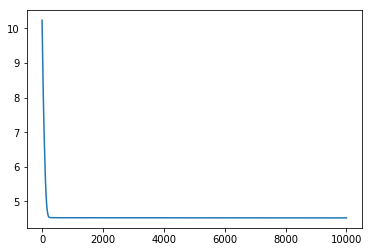

In [37]:
plt.plot(list(range(len(losses))),losses)

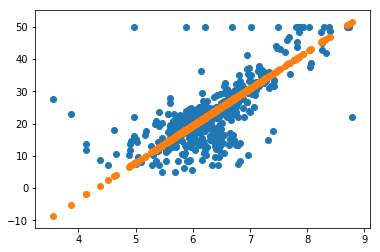

In [38]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)

In [39]:
best_k

11.474267067195889

In [40]:
best_b

-49.42556521740964

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)